# **CLASSIFICATION PROJECT - Bank Marketing Analysis**

Target - has the client subscribed a term deposit?

# Pre-preocessing

In [ ]:
from google.colab import files #for uploading the file
uploaded = files.upload()

Saving bank_intern.xlsx to bank_intern.xlsx


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data= pd.read_excel("/content/bank_intern.xlsx") #path
print(data.head()) #data is my dataset name

   Age          Job  Martial            Education Default Housing Loan  \
0   37       admin.  married    university.degree      no     yes   no   
1   45   technician  married  professional.course      no     yes   no   
2   34  blue-collar  married             basic.9y      no     yes   no   
3   38  blue-collar  married              unknown      no     yes   no   
4   33       admin.  married          high.school      no     yes   no   

    Contact Month Day_of_week  ...  Campaign  pdays  Previous     poutcome  \
0  cellular   jul         wed  ...         1    999         0  nonexistent   
1  cellular   jul         wed  ...         1    999         0  nonexistent   
2  cellular   jul         wed  ...         1    999         0  nonexistent   
3  cellular   jul         wed  ...         1    999         0  nonexistent   
4  cellular   jul         wed  ...         1    999         0  nonexistent   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed   Y  
0         

In [ ]:
data.columns #no. of columns

Index(['Age', 'Job', 'Martial', 'Education', 'Default', 'Housing', 'Loan',
       'Contact', 'Month', 'Day_of_week', 'Duration', 'Campaign', 'pdays',
       'Previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'Y'],
      dtype='object')

In [ ]:
data.info() #summary of DataFrame structure and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             41188 non-null  int64  
 1   Job             41188 non-null  object 
 2   Martial         41188 non-null  object 
 3   Education       41188 non-null  object 
 4   Default         41188 non-null  object 
 5   Housing         41188 non-null  object 
 6   Loan            41188 non-null  object 
 7   Contact         41188 non-null  object 
 8   Month           41188 non-null  object 
 9   Day_of_week     41188 non-null  object 
 10  Duration        41188 non-null  int64  
 11  Campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  Previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
data = data.drop(['Day_of_week'], axis=1) #dropping the column

In [ ]:
data.isna().sum() #no. of null values

Age               0
Job               0
Martial           0
Education         0
Default           0
Housing           0
Loan              0
Contact           0
Month             0
Duration          0
Campaign          0
pdays             0
Previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
Y                 0
dtype: int64

In [ ]:
data.shape

(41188, 20)

In [ ]:
data.shape[1]

20

In [ ]:
for i in range(data.shape[1]):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [ ]:
# Iterate over each column in the dataset and print unique values along with their value counts
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())
  print(data.iloc[:,i].value_counts())

[37 45 34 38 33 54 35 25 31 57 29 53 43 48 51 30 42 36 40 28 32 44 52 26
 46 41 47 56 39 49 58 24 59 27 55 50 23 21 22 60 80 67 70 61 66 73 62 75
 85 86 71 72 76 83 64 84 20 88 89 65 77 74 68 78 18 82 63 95 19 69 81 87
 79 98 91 92 17 94]
Age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
98       2
91       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64
['admin.' 'technician' 'blue-collar' 'services' 'management' 'housemaid'
 'entrepreneur' 'self-employed' 'retired' 'unemployed' 'unknown' 'student']
Job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
['married' 'single' 'divorced' 'unknown']
Martial
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: i

coverting the job into categories

In [ ]:
# Define a function to categorize the job types
def categorize_job(job):
    if job in ['management', 'entrepreneur', 'admin.']:
        return 'high_earning'
    elif job in ['technician','blue-collar', 'services','self-employed']:
        return 'moderate_earning'
    elif job in [ 'housemaid', 'retired', 'unemployed', 'student','unknown']:
        return 'low_earning'


# Apply the categorization to the 'Job' column
data['Job_category'] = data['Job'].apply(categorize_job)

# Display the first few rows with the new 'Job_category' column
data[['Job', 'Job_category']].head()


Job      Job_category
0       admin.      high_earning
1   technician  moderate_earning
2  blue-collar  moderate_earning
3  blue-collar  moderate_earning
4       admin.      high_earning

In [ ]:
# Define a function to categorize the education types
def categorize_education(education):
    if education in ['unknown', 'illiterate']:
        return 'no_edu'
    elif education in ['basic.4y', 'basic.6y']:
        return 'basic_edu'
    elif education in ['high.school', 'basic.9y']:
        return 'med_edu'
    elif education in ['professional.course', 'university.degree']:
        return 'high_edu'


# Apply the categorization to the 'Education' column
data['Education_category'] = data['Education'].apply(categorize_education)

# Display the first few rows with the new 'Education_category' column
data[['Education', 'Education_category']].head()


Education Education_category
0    university.degree           high_edu
1  professional.course           high_edu
2             basic.9y            med_edu
3              unknown             no_edu
4          high.school            med_edu

In [ ]:
# Define a function to categorize the months
def categorize_month(month):
    if month in ['jan', 'feb', 'mar']:
        return 'Q1'
    elif month in ['apr', 'may', 'jun']:
        return 'Q2'
    elif month in ['jul', 'aug', 'sep']:
        return 'Q3'
    elif month in ['oct', 'nov', 'dec']:
        return 'Q4'


# Apply the categorization to the 'Month' column
data['Month_category'] = data['Month'].apply(categorize_month)

# Display the first few rows with the new 'Month_category' column
data[['Month', 'Month_category']].head()


Month Month_category
0   jul             Q3
1   jul             Q3
2   jul             Q3
3   jul             Q3
4   jul             Q3

In [ ]:
# Drop the original columns and keep only the categorized ones
data_org = data.drop(['Job', 'Education', 'Month'], axis=1)

# Display the first few rows of the updated dataframe
data_org.head()

Age  Martial Default Housing Loan   Contact  Duration  Campaign  pdays  \
0   37  married      no     yes   no  cellular       353         1    999   
1   45  married      no     yes   no  cellular        95         1    999   
2   34  married      no     yes   no  cellular       477         1    999   
3   38  married      no     yes   no  cellular       131         1    999   
4   33  married      no     yes   no  cellular       134         1    999   

   Previous     poutcome  emp_var_rate  cons_price_idx  cons_conf_idx  \
0         0  nonexistent           1.4          93.918          -42.7   
1         0  nonexistent           1.4          93.918          -42.7   
2         0  nonexistent           1.4          93.918          -42.7   
3         0  nonexistent           1.4          93.918          -42.7   
4         0  nonexistent           1.4          93.918          -42.7   

   euribor3m  nr_employed   Y      Job_category Education_category  \
0      4.962       5228.1  no      high_earning           high_edu   
1      4.962       5228.1  no  moderate_earning           high_edu   
2      4.962       5228.1  no  moderate_earning            med_edu   
3      4.962       5228.1  no  moderate_earning             no_edu   
4      4.962       5228.1  no      high_earning            med_edu   

  Month_category  
0             Q3  
1             Q3  
2             Q3  
3             Q3  
4             Q3

In [ ]:
data_org.columns

Index(['Age', 'Martial', 'Default', 'Housing', 'Loan', 'Contact', 'Duration',
       'Campaign', 'pdays', 'Previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'Y',
       'Job_category', 'Education_category', 'Month_category'],
      dtype='object')

In [ ]:
for i in range(data_org.shape[1]):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [ ]:
# Iterate over each column in the dataset and print unique values along with their value counts
for i in range(data_org.shape[1]):
  print(data_org.iloc[:,i].unique())
  print(data_org.iloc[:,i].value_counts())

[37 45 34 38 33 54 35 25 31 57 29 53 43 48 51 30 42 36 40 28 32 44 52 26
 46 41 47 56 39 49 58 24 59 27 55 50 23 21 22 60 80 67 70 61 66 73 62 75
 85 86 71 72 76 83 64 84 20 88 89 65 77 74 68 78 18 82 63 95 19 69 81 87
 79 98 91 92 17 94]
Age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
98       2
91       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64
['married' 'single' 'divorced' 'unknown']
Martial
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
['no' 'unknown' 'yes']
Default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
['yes' 'no' 'unknown']
Housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
['no' 'yes' 'unknown']
Loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64
['cellular' 'telephone']
Contact
cellular     26144
telephone    15044
Name: count, dtype: int64
[ 353   95  477 ... 1868 3509 16

Encoding

In [ ]:
# Reorder the categorical columns to ensure 'unknown' is first
data_org['Loan'] = pd.Categorical(data_org['Loan'], categories=['unknown', 'yes', 'no'], ordered=True)
data_org['Martial'] = pd.Categorical(data_org['Martial'], categories=['unknown', 'married', 'single', 'divorced'], ordered=True)
data_org['Housing'] = pd.Categorical(data_org['Housing'], categories=['unknown', 'yes', 'no'], ordered=True)

# List of categorical columns including your custom categories
categorical_columns = [
    'Martial', 'Default', 'Housing',
    'Loan', 'Contact', 'poutcome', 'Job_category', 'Education_category', 'Month_category'
]

# Apply dummy variable encoding (one-hot encoding with drop_first=True)
data_encoded = pd.get_dummies(data_org, columns=categorical_columns, drop_first=True)

# Convert 'yes' and 'no' to 1 and 0 respectively for remaining columns
data_encoded = data_encoded.replace({'yes': 1, 'no': 0})


# Display the first few rows of the dummy variable encoded dataset
print(data_encoded.head())


   Age  Duration  Campaign  pdays  Previous  emp_var_rate  cons_price_idx  \
0   37       353         1    999         0           1.4          93.918   
1   45        95         1    999         0           1.4          93.918   
2   34       477         1    999         0           1.4          93.918   
3   38       131         1    999         0           1.4          93.918   
4   33       134         1    999         0           1.4          93.918   

   cons_conf_idx  euribor3m  nr_employed  ...  poutcome_nonexistent  \
0          -42.7      4.962       5228.1  ...                  True   
1          -42.7      4.962       5228.1  ...                  True   
2          -42.7      4.962       5228.1  ...                  True   
3          -42.7      4.962       5228.1  ...                  True   
4          -42.7      4.962       5228.1  ...                  True   

   poutcome_success  Job_category_low_earning  Job_category_moderate_earning  \
0             False           

<ipython-input-19-8460db357960>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data_encoded.replace({'yes': 1, 'no': 0})


In [ ]:
data_encoded.columns

Index(['Age', 'Duration', 'Campaign', 'pdays', 'Previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'Y',
       'Martial_married', 'Martial_single', 'Martial_divorced',
       'Default_unknown', 'Default_yes', 'Housing_yes', 'Housing_no',
       'Loan_yes', 'Loan_no', 'Contact_telephone', 'poutcome_nonexistent',
       'poutcome_success', 'Job_category_low_earning',
       'Job_category_moderate_earning', 'Education_category_high_edu',
       'Education_category_med_edu', 'Education_category_no_edu',
       'Month_category_Q2', 'Month_category_Q3', 'Month_category_Q4'],
      dtype='object')

In [ ]:
# Identify boolean columns
boolean_columns = data_encoded.select_dtypes(include='bool').columns

# Convert only boolean columns to 0/1 (int)
data_encoded[boolean_columns] = data_encoded[boolean_columns].astype(int)

# Display the first few rows and check the dtypes to confirm only boolean columns are converted
print(data_encoded.dtypes)
print(data_encoded.head())

Age                                int64
Duration                           int64
Campaign                           int64
pdays                              int64
Previous                           int64
emp_var_rate                     float64
cons_price_idx                   float64
cons_conf_idx                    float64
euribor3m                        float64
nr_employed                      float64
Y                                  int64
Martial_married                    int64
Martial_single                     int64
Martial_divorced                   int64
Default_unknown                    int64
Default_yes                        int64
Housing_yes                        int64
Housing_no                         int64
Loan_yes                           int64
Loan_no                            int64
Contact_telephone                  int64
poutcome_nonexistent               int64
poutcome_success                   int64
Job_category_low_earning           int64
Job_category_mod

Independent and dependent :

In [ ]:
X=data_encoded.drop(['Y'],axis=1)

print(X)
y = data_encoded['Y']
print(y)

       Age  Duration  Campaign  pdays  Previous  emp_var_rate  cons_price_idx  \
0       37       353         1    999         0           1.4          93.918   
1       45        95         1    999         0           1.4          93.918   
2       34       477         1    999         0           1.4          93.918   
3       38       131         1    999         0           1.4          93.918   
4       33       134         1    999         0           1.4          93.918   
...    ...       ...       ...    ...       ...           ...             ...   
41183   54       178         4      3         1          -1.1          94.601   
41184   65       201         5      3         1          -1.1          94.601   
41185   37       142         4      6         1          -1.1          94.601   
41186   28        92         4     17         3          -1.1          94.601   
41187   62       238         4     18         2          -1.1          94.601   

       cons_conf_idx  eurib

# *EDA*

Heatmap

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Heatmap : : Heatmaps are used to highlight areas of interest or intensity within a dataset. They are particularly useful for identifying trends, correlations, and outliers.

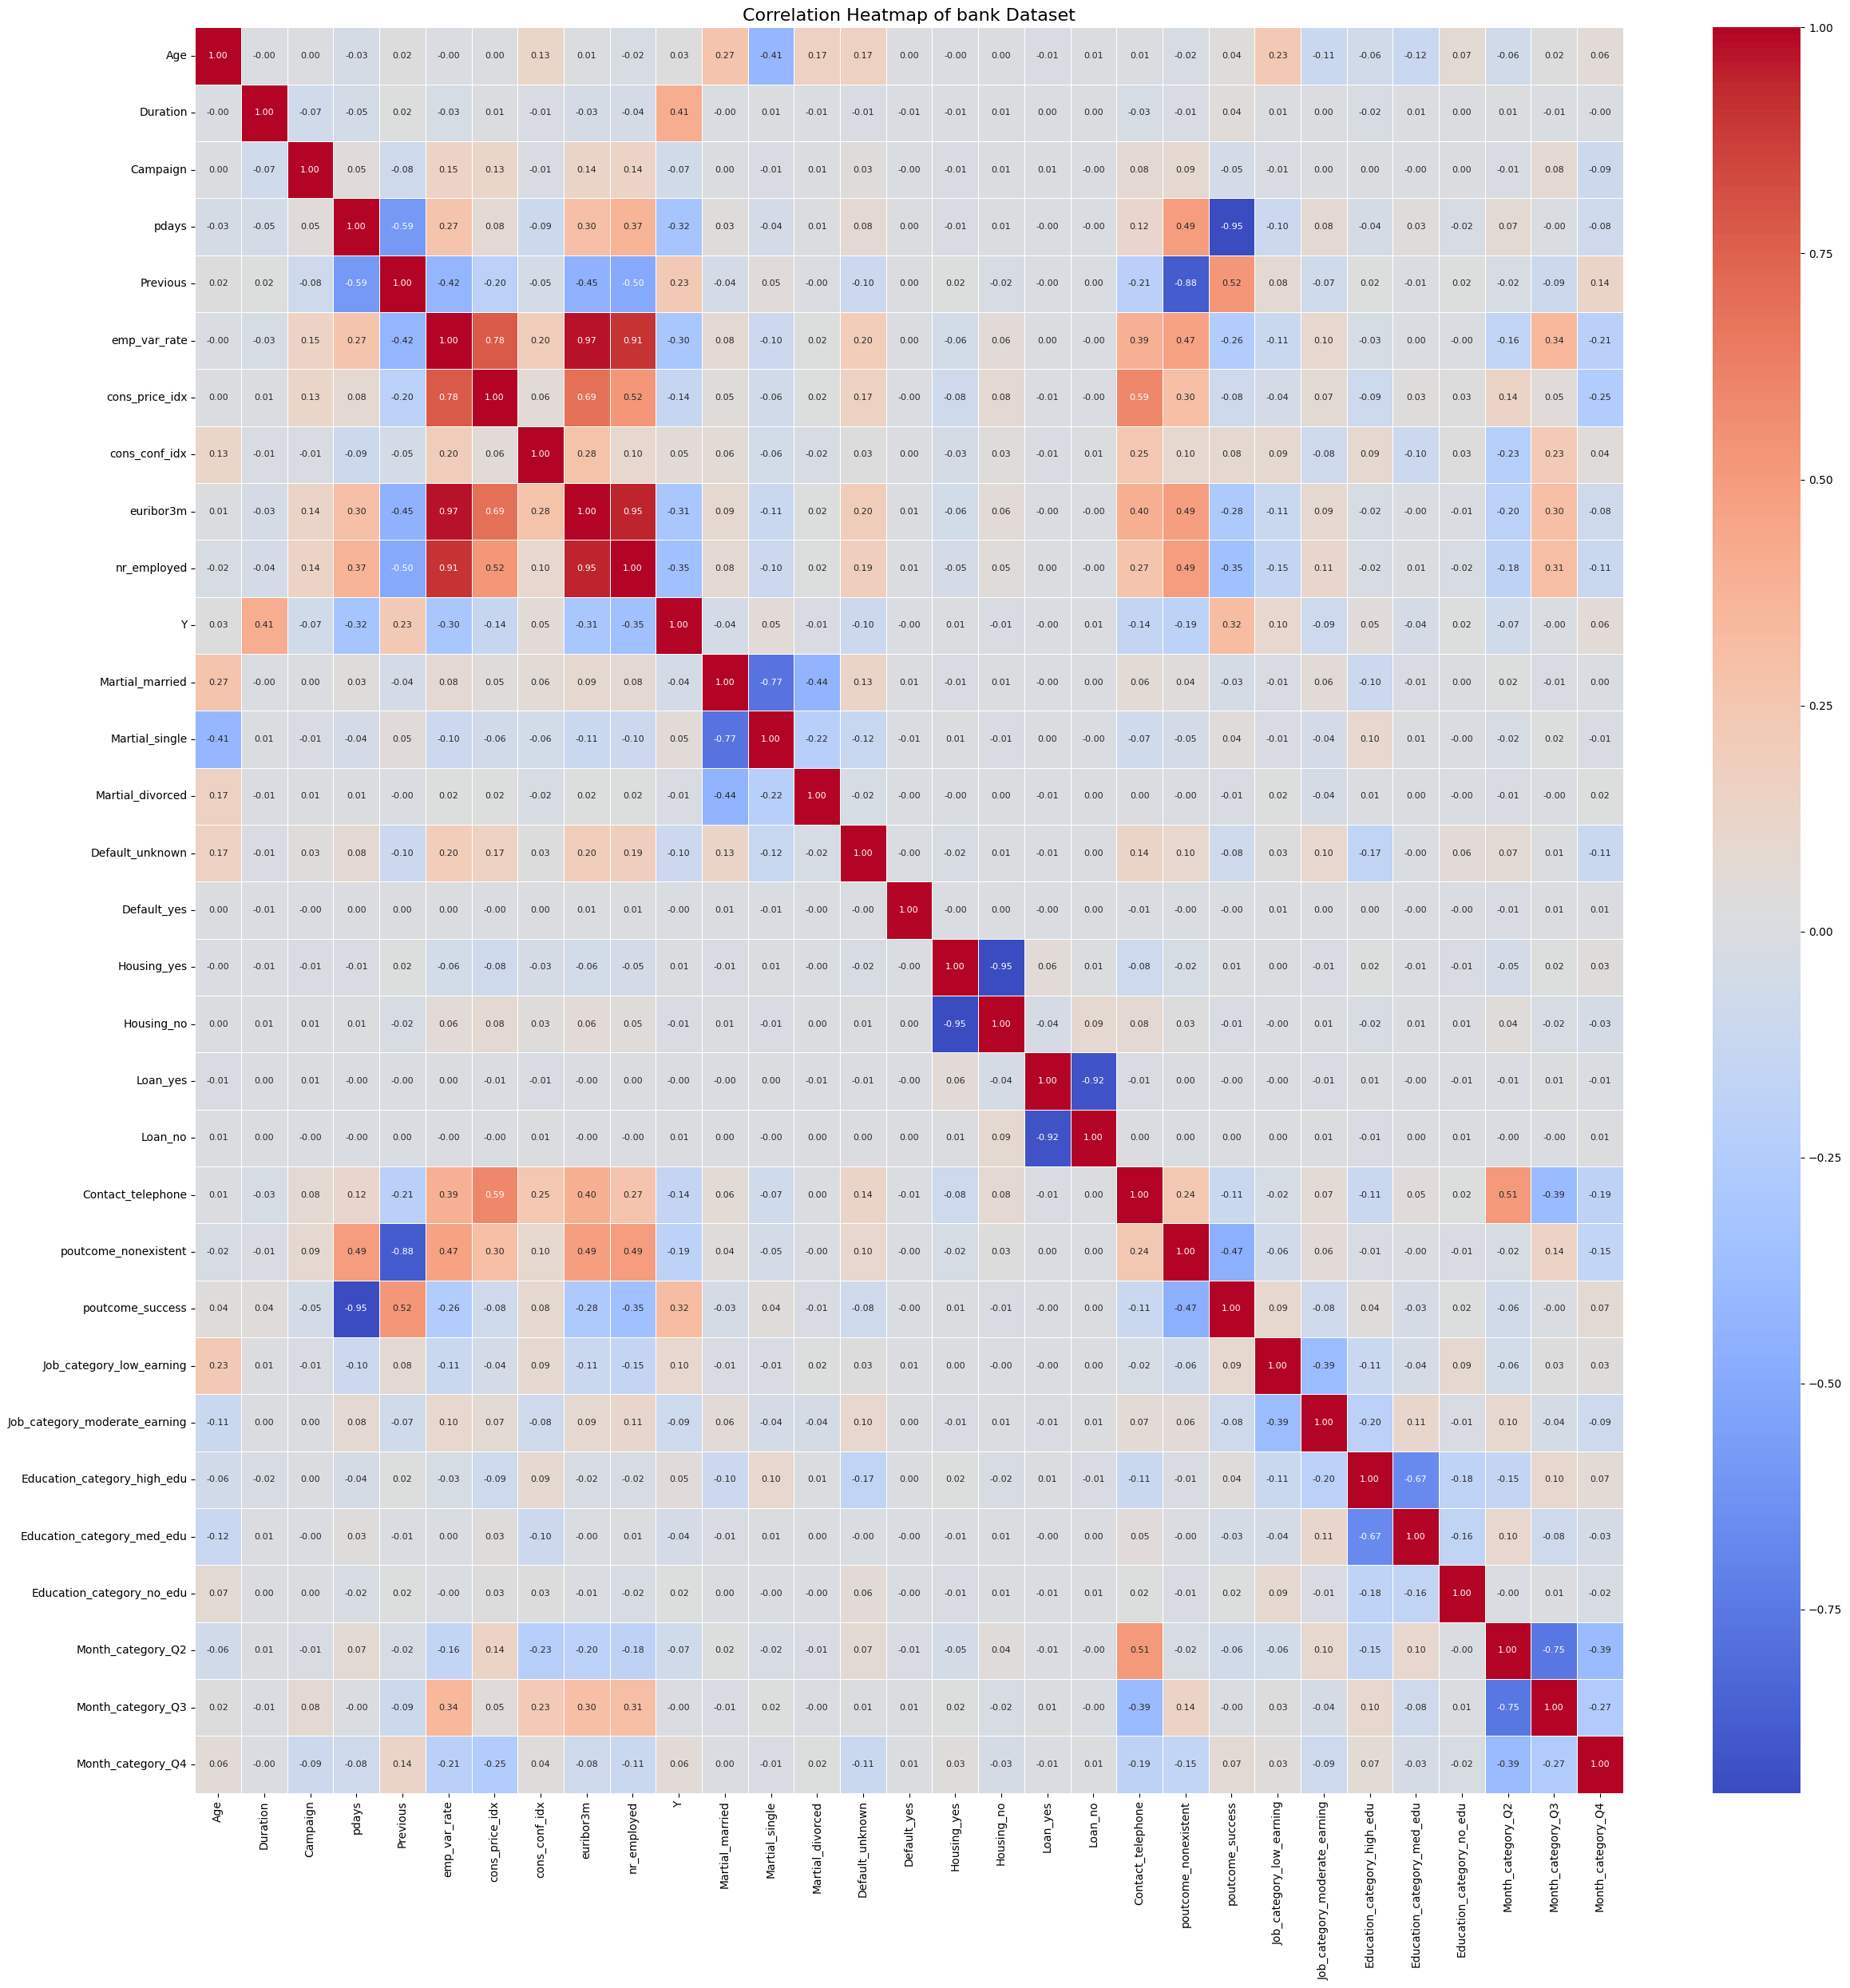

In [ ]:
# Calculate the correlation matrix
corr_matrix = data_encoded.corr()

# Set a larger plot size
plt.figure(figsize=(25, 25))

# Create the heatmap with smaller annotation font size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 8})
#heatmap - coorelation by using an heatmap
#annot=True: Annotates each cell with the correlation coefficient.
#cmap='coolwarm': Uses the ‘coolwarm’ colormap to color the heatmap.
#fmt='.2f': Formats the annotation text to two decimal places.
#linewidths=0.5: Sets the width of the lines that divide the cells.
#annot_kws={"size": 8}: Sets the font size of the annotations to 8


# Add a title with increased font size for better visibility
plt.title('Correlation Heatmap of bank Dataset', fontsize=16)

# Show the plot with tight layout for better spacing
plt.tight_layout()  #plt.tight_layout(): Adjusts the padding between and around subplots to minimize overlap and improve spacing.

plt.show()

Red indicates a strong positive correlation.
Blue indicates a strong negative correlation.
Lighter colors indicate weaker correlations.
Diagonal Line: The diagonal from the top left to the bottom right shows perfect positive correlations (each variable compared to itself).

---



PLots:

Count Plot :  To display the frequency of each category in a dataset.A countplot is a type of bar plot that shows the number of observations (counts) for each category of a categorical variable

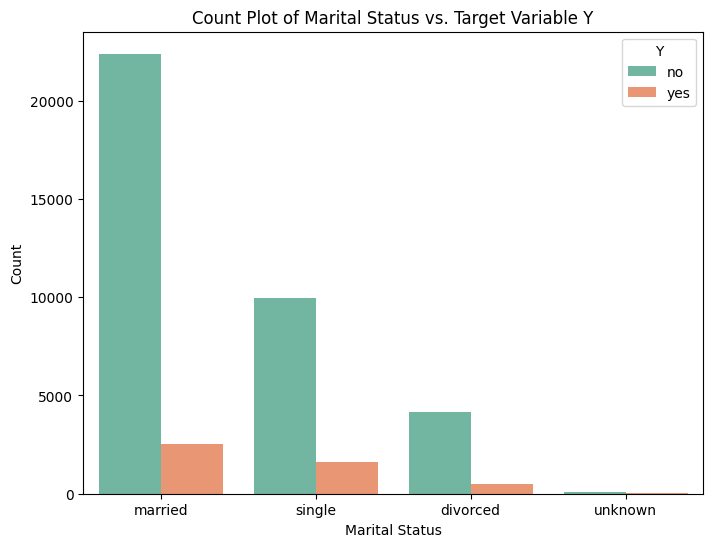

In [ ]:
# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Martial', hue='Y', data=data, palette='Set2')

# Customize the plot
plt.title('Count Plot of Marital Status vs. Target Variable Y')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Y')

# Show the plot
plt.show()

The graph suggests that marital status may not have a significant impact on the likelihood of a positive response to the campaign, as the distribution of responses is similar across the different marital statuses. The data also indicates that the majority of individuals in each category did not respond positively to the campaign.

---



countplot :  education_category

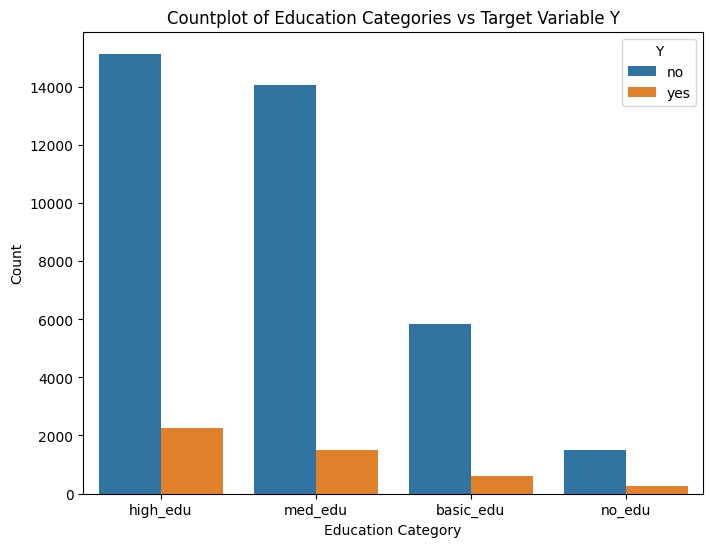

In [ ]:
# Create a countplot showing the distribution of Education_category against Y
plt.figure(figsize=(8,6))
sns.countplot(x='Education_category', hue='Y', data=data, order=['high_edu', 'med_edu', 'basic_edu', 'no_edu'])

# Add title and labels
plt.title('Countplot of Education Categories vs Target Variable Y')
plt.xlabel('Education Category')
plt.ylabel('Count')

# Show the plot
plt.show()

countplot : job category

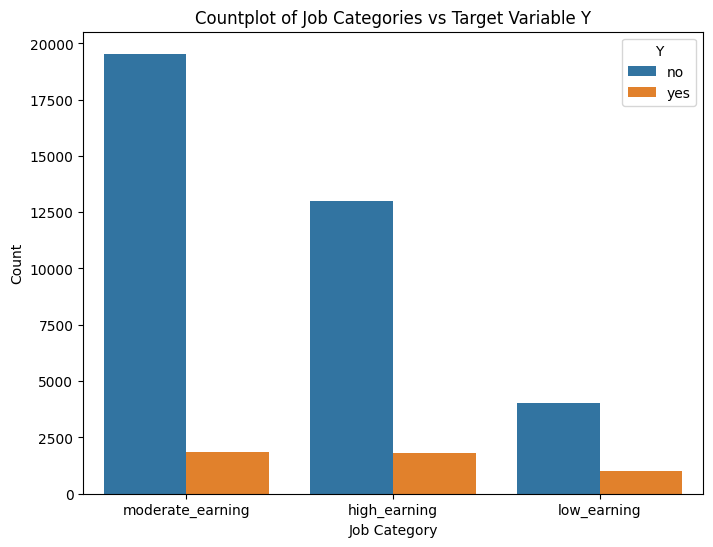

In [ ]:
# Create a countplot showing the distribution of Job_category against Y
plt.figure(figsize=(8,6))
sns.countplot(x='Job_category', hue='Y', data=data, order=['moderate_earning', 'high_earning', 'low_earning'])

# Add title and labels
plt.title('Countplot of Job Categories vs Target Variable Y')
plt.xlabel('Job Category')
plt.ylabel('Count')

# Show the plot
plt.show()

The plot suggests that job and education category may not have a strong influence on whether individuals respond positively to the marketing campaign, as the distribution of responses is similar across the two job categories. Most individuals, regardless of job category, did not respond positively to the campaign, indicating that other factors might be more influential in determining the campaign's success.

---

Box plot : Box plots are useful for visualizing the spread and skewness of data, as well as identifying potential outliers. They are particularly helpful when comparing distributions across different groups.

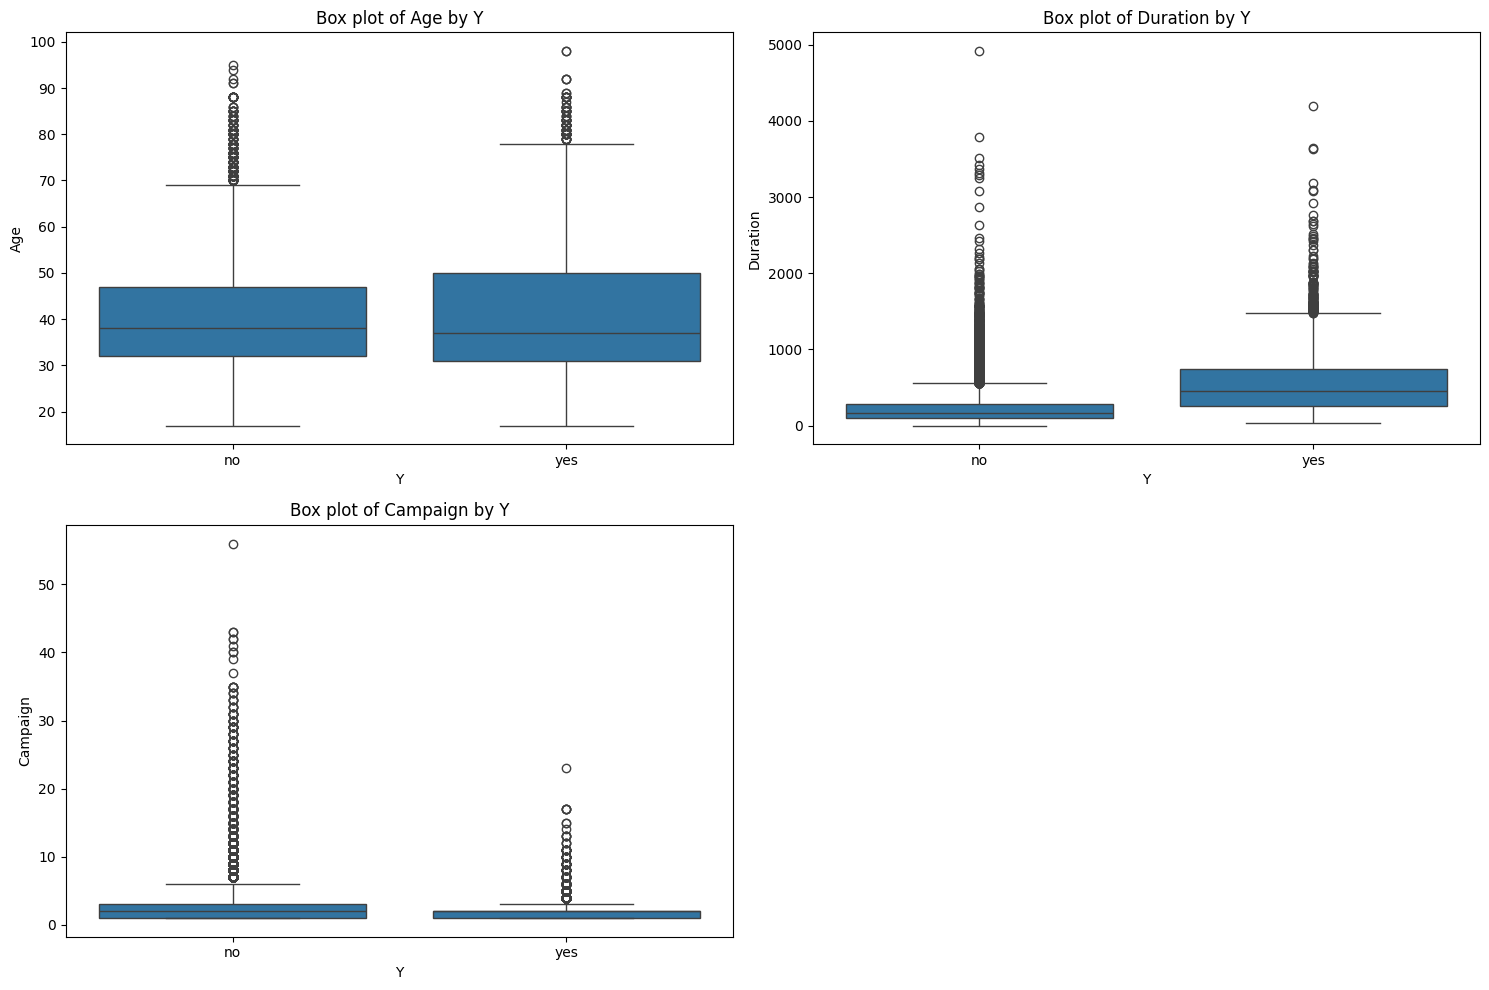

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Create box plots for 'Age', 'Duration', and 'Campaign' with respect to 'Y'
numeric_columns = ['Age', 'Duration', 'Campaign']
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)  # Create a subplot for each variable
    sns.boxplot(x='Y', y=col, data=data)
    plt.title(f'Box plot of {col} by Y')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Duration is a standout feature, showing a significant difference between "no" and "yes" outcomes. Higher durations are more strongly associated with "yes" responses.
Age and Campaign have more subtle differences between groups, though "Campaign" shows a higher number of repeated contacts in the "no" group, which could indicate inefficiency in repeated marketing efforts.

---



scatter plot for duration

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client



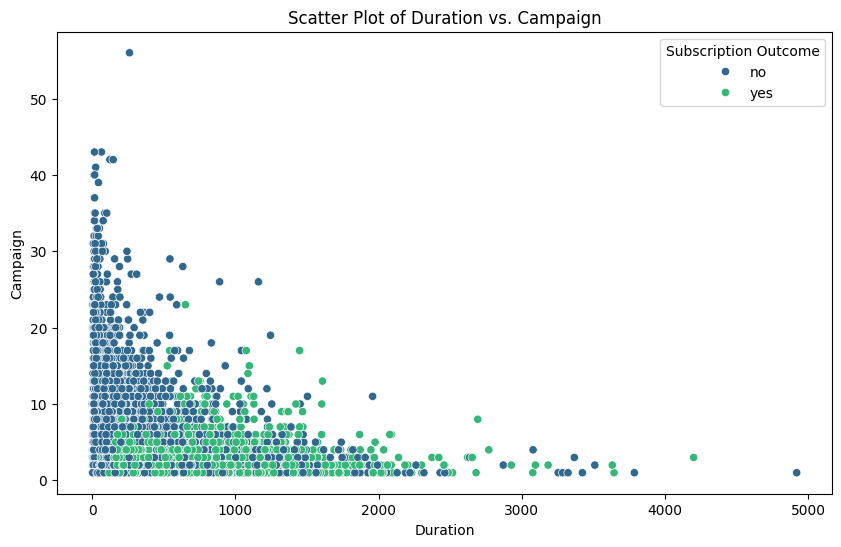

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Campaign', hue='Y', data=data, palette='viridis')
plt.title('Scatter Plot of Duration vs. Campaign')
plt.xlabel('Duration')
plt.ylabel('Campaign')
plt.legend(title='Subscription Outcome')
plt.show()

Blue points (no subscription) are densely populated in the lower range of both axes, suggesting that shorter durations and fewer campaigns are associated with negative outcomes.
Green points (yes subscription) are more sparsely scattered but show a slight concentration in the lower left corner, indicating that positive outcomes do not strongly depend on duration or the number of campaigns.
This plot likely visualizes the relationship between the duration of an interaction (like a call or service) and the number of campaigns (possibly marketing efforts) against the subscription outcomes. It suggests that shorter interactions and fewer campaigns tend to result in negative subscription outcomes.

---



Pie chart - A pie chart is a circular graph divided into slices to illustrate numerical proportions.

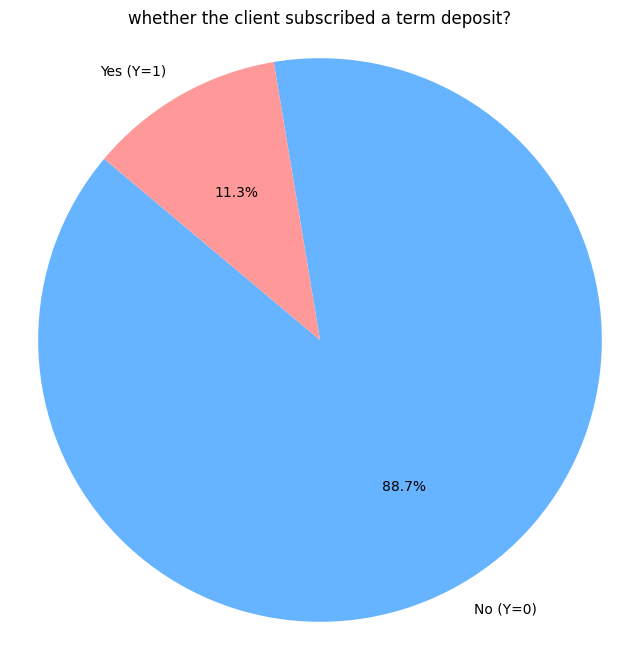

In [ ]:
# Count the values of 'Y'
y_counts = data_encoded['Y'].value_counts()

# Create labels and sizes for the pie chart
labels = ['No (Y=0)', 'Yes (Y=1)']
sizes = y_counts.values

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
#'%1.1f%%' specifies that the labels should be formatted as percentages with one decimal place.
#Setting startangle=140 rotates the start of the pie chart by 140 degrees counterclockwise.

# Customize the plot
plt.title('whether the client subscribed a term deposit?')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Show the plot
plt.show()

No (Y=0): This section is colored blue and represents 88.7% of the data. It indicates the proportion of instances where the target variable ( Y ) is 0.
Yes (Y=1): This section is colored red and represents 11.3% of the data. It indicates the proportion of instances where the target variable ( Y ) is 1.

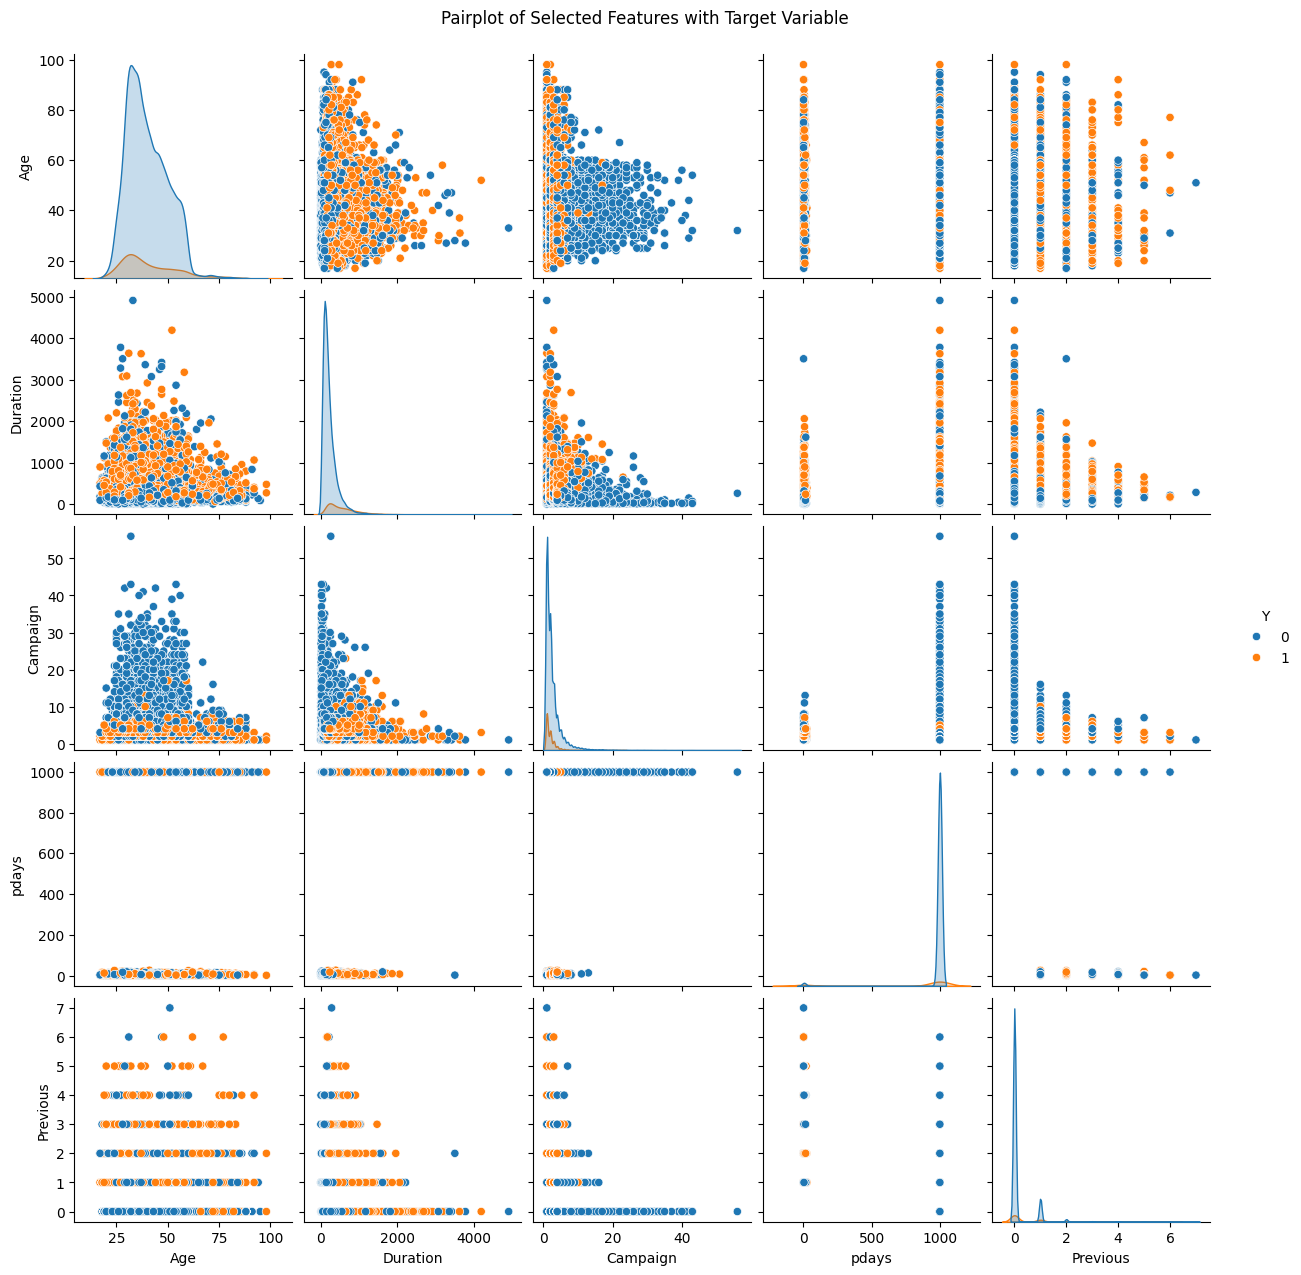

In [ ]:
# Select features for pairplot
selected_features = ['Age', 'Duration', 'Campaign', 'pdays', 'Previous']

# Create a pairplot
sns.pairplot(data_encoded[selected_features + ['Y']], hue='Y')

# Show the plot
plt.suptitle('Pairplot of Selected Features with Target Variable', y=1.02)
plt.show()

Diagonal Plots: These are histograms that show the distribution of individual variables. Each plot on the diagonal represents a single variable.
Off-Diagonal Plots: These are scatter plots that show the relationships between pairs of variables. Each scatter plot represents a pair of variables, allowing you to see potential correlations or patterns.
Principal Selected Features: The text at the bottom right indicates that these plots focus on key features selected from a larger dataset. This is often done in data analysis or machine learning to highlight the most important variables.
There is a noticeable difference in the distribution of Duration for both Y = 0 and Y = 1. Longer durations are more common for positive outcomes (Y = 1).
Campaign shows a negative correlation with Y, where a higher number of contacts during the campaign is generally associated with Y = 0.
pdays has a skewed distribution, with most observations centered around specific values, likely showing how long it's been since the client was last contacted.
Previous indicates that for clients with a high number of prior contacts, there seems to be some distinction between the outcomes Y = 0 and Y = 1.

---



# Splitting in different ratios before feature selection

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, train_size=0.70)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20, train_size=0.80)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.40, train_size=0.60)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.25, train_size=0.75)

In [ ]:
X=data_encoded.drop(['Y'],axis=1)
y = data_encoded['Y']

# Algorithms

### Logistic regression

In [ ]:
#70 - 30

# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train1, y_train1)
predictions1 = logreg.predict(X_test1)
print(predictions1)

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
z=confusion_matrix(y_test1, predictions1)
z

array([[10629,   298],
       [  858,   572]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,predictions1)

0.9064497855466537

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,predictions1))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10927
           1       0.66      0.40      0.50      1430

    accuracy                           0.91     12357
   macro avg       0.79      0.69      0.72     12357
weighted avg       0.89      0.91      0.90     12357



In [ ]:
#80 - 20

# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train2, y_train2)
predictions2 = logreg.predict(X_test2)
print(predictions2)

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
z=confusion_matrix(y_test2, predictions2)
z

array([[7125,  205],
       [ 534,  374]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,predictions2)

0.9102937606215101

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test2,predictions2))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7330
           1       0.65      0.41      0.50       908

    accuracy                           0.91      8238
   macro avg       0.79      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [ ]:
#60 - 40

# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train3, y_train3)
predictions3 = logreg.predict(X_test3)
print(predictions3)

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
z=confusion_matrix(y_test3, predictions3)
z

array([[14222,   373],
       [ 1123,   758]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3,predictions3)

0.9092012624423403

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test3,predictions3))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14595
           1       0.67      0.40      0.50      1881

    accuracy                           0.91     16476
   macro avg       0.80      0.69      0.73     16476
weighted avg       0.90      0.91      0.90     16476



In [ ]:
#75 - 25

# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train4, y_train4)
predictions4 = logreg.predict(X_test4)
print(predictions4)

[0 0 0 ... 0 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
z=confusion_matrix(y_test4, predictions4)
z

array([[8883,  264],
       [ 663,  487]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test4,predictions4)

0.9099737787705157

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test4,predictions4))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9147
           1       0.65      0.42      0.51      1150

    accuracy                           0.91     10297
   macro avg       0.79      0.70      0.73     10297
weighted avg       0.90      0.91      0.90     10297



Best accuracy for 70-30 ratio for logistic regression i.e, 0.92

---



# KNN BEFORE FEATURE SELECTION

70 - 30 ratio

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)

In [ ]:
model.fit(X_train1,y_train1)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred1 = model.predict(X_test1)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
knn

Predicted  Actual
18363          0       0
14327          0       0
27356          0       0
7369           0       0
41153          1       1
...          ...     ...
30167          0       0
32937          0       0
27183          0       0
13844          0       1
29751          0       0

[12357 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred1)

0.908877559278142

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1,y_pred1)
cm

array([[10539,   388],
       [  738,   692]])

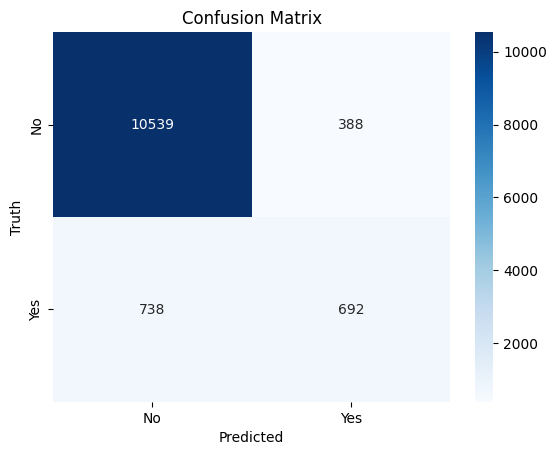

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test1, y_pred1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10927
           1       0.64      0.48      0.55      1430

    accuracy                           0.91     12357
   macro avg       0.79      0.72      0.75     12357
weighted avg       0.90      0.91      0.90     12357



80 - 20 ratio

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)

In [ ]:
model.fit(X_train2,y_train2)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred2 = model.predict(X_test2)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
knn

Predicted  Actual
34080          0       0
2474           0       0
23089          0       0
13528          0       0
20677          0       0
...          ...     ...
31188          0       0
7340           0       0
22646          0       0
12863          0       0
5959           0       0

[8238 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,y_pred2)

0.9122359796067007

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2,y_pred2)
cm

array([[7058,  272],
       [ 451,  457]])

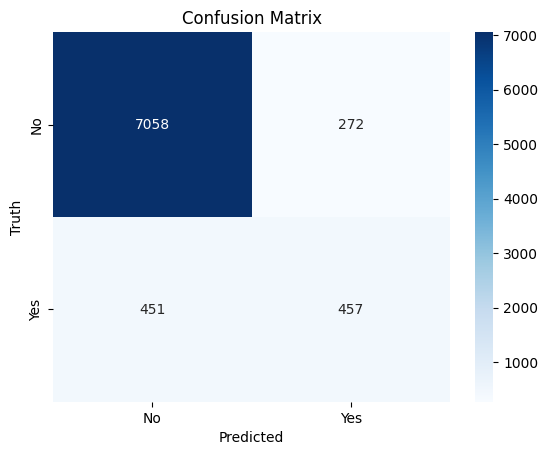

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test2, y_pred2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7330
           1       0.63      0.50      0.56       908

    accuracy                           0.91      8238
   macro avg       0.78      0.73      0.75      8238
weighted avg       0.91      0.91      0.91      8238



60 - 40 ratio



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)

In [ ]:
model.fit(X_train3,y_train3)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred3 = model.predict(X_test3)
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
knn

Predicted  Actual
22448          0       0
39441          0       0
24547          0       0
36266          0       0
38577          1       1
...          ...     ...
5019           0       0
13913          0       0
28702          0       1
3590           0       0
23350          0       0

[16476 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import accuracy_score
accuracy_score(y_test3,y_pred3)

0.9113862588006798

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test3,y_pred3)
cm

array([[14068,   527],
       [  933,   948]])

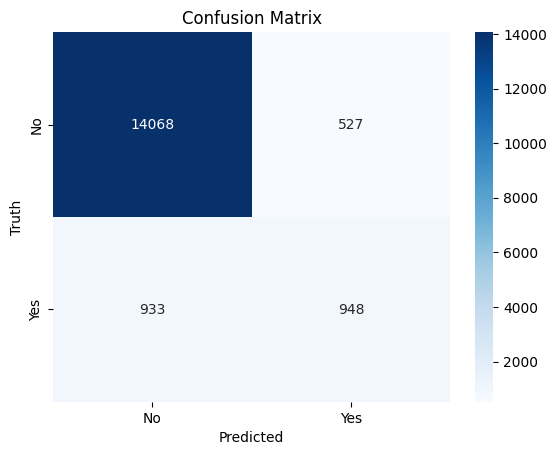

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test3, y_pred3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14595
           1       0.64      0.50      0.56      1881

    accuracy                           0.91     16476
   macro avg       0.79      0.73      0.76     16476
weighted avg       0.90      0.91      0.91     16476



75 - 25 ratio

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)

In [ ]:
model.fit(X_train4,y_train4)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred4 = model.predict(X_test4)
y_pred4

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
knn

Predicted  Actual
19546          0       0
29174          0       0
31091          0       0
3788           0       0
10724          0       0
...          ...     ...
29517          0       0
5569           0       1
40800          1       1
27448          0       0
10075          1       1

[10297 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import accuracy_score
accuracy_score(y_test4,y_pred4)

0.9100708944352724

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test4,y_pred4)
cm

array([[8784,  363],
       [ 563,  587]])

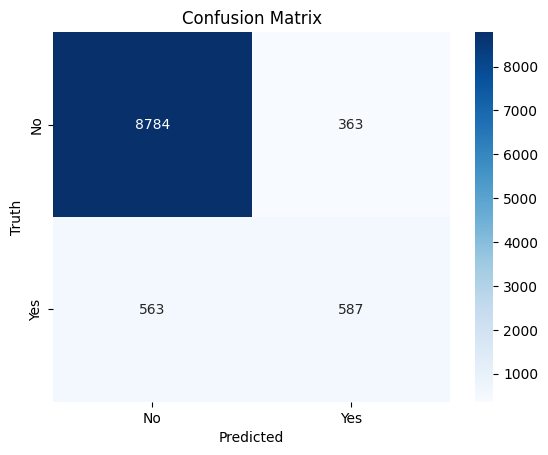

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test4, y_pred4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9147
           1       0.62      0.51      0.56      1150

    accuracy                           0.91     10297
   macro avg       0.78      0.74      0.75     10297
weighted avg       0.90      0.91      0.91     10297



KNN before feature selection 60-40 ratio has 0.91168



---



# SVM BEFORE THE FEATURE SELECTION

70 - 30 ratio

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='rbf')

In [ ]:
model.fit(X_train1, y_train1)

SVC()

In [ ]:
y_pred1 = model.predict(X_test1)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
svm

Predicted  Actual
18363          0       0
14327          0       0
27356          0       0
7369           0       0
41153          1       1
...          ...     ...
30167          0       0
32937          0       0
27183          0       0
13844          0       1
29751          0       0

[12357 rows x 2 columns]

In [ ]:
#evaluation metrics
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred1)

0.894229991098163

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1,y_pred1)
cm

array([[10736,   191],
       [ 1116,   314]])

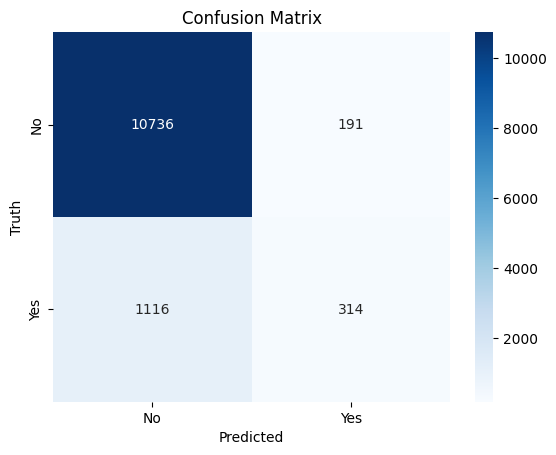

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test1, y_pred1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10927
           1       0.62      0.22      0.32      1430

    accuracy                           0.89     12357
   macro avg       0.76      0.60      0.63     12357
weighted avg       0.87      0.89      0.87     12357



60 - 40 ratio

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='rbf')

In [ ]:
model.fit(X_train3, y_train3)

SVC()

In [ ]:
y_pred3 = model.predict(X_test3)
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
svm

Predicted  Actual
22448          0       0
39441          0       0
24547          0       0
36266          0       0
38577          0       1
...          ...     ...
5019           0       0
13913          0       0
28702          0       1
3590           0       0
23350          0       0

[16476 rows x 2 columns]

In [ ]:
#evaluation metrics
from sklearn.metrics import accuracy_score
accuracy_score(y_test3,y_pred3)

0.8988832240835154

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test3,y_pred3)
cm

array([[14371,   224],
       [ 1442,   439]])

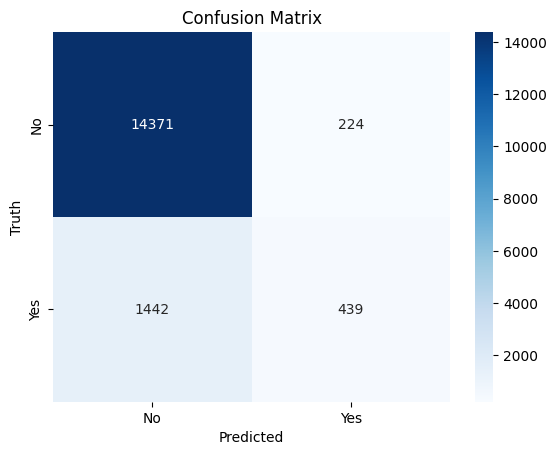

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test3, y_pred3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     14595
           1       0.66      0.23      0.35      1881

    accuracy                           0.90     16476
   macro avg       0.79      0.61      0.65     16476
weighted avg       0.88      0.90      0.88     16476



80 - 20 ratio

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='rbf')

In [ ]:
model.fit(X_train2, y_train2)

SVC()

In [ ]:
y_pred2 = model.predict(X_test2)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
svm

Predicted  Actual
34080          0       0
2474           0       0
23089          0       0
13528          0       0
20677          0       0
...          ...     ...
31188          0       0
7340           0       0
22646          0       0
12863          0       0
5959           0       0

[8238 rows x 2 columns]

In [ ]:
#evaluation metrics
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,y_pred2)

0.9014323865015781

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2,y_pred2)
cm

array([[7219,  111],
       [ 701,  207]])

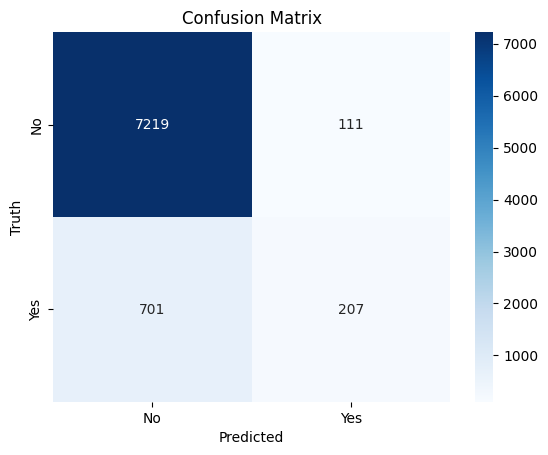

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test2, y_pred2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7330
           1       0.65      0.23      0.34       908

    accuracy                           0.90      8238
   macro avg       0.78      0.61      0.64      8238
weighted avg       0.88      0.90      0.88      8238



75 - 25 ratio

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='rbf')

In [ ]:
model.fit(X_train4, y_train4)

SVC()

In [ ]:
y_pred4 = model.predict(X_test4)
y_pred4

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
svm

Predicted  Actual
19546          0       0
29174          0       0
31091          0       0
3788           0       0
10724          0       0
...          ...     ...
29517          0       0
5569           0       1
40800          1       1
27448          0       0
10075          0       1

[10297 rows x 2 columns]

In [ ]:
#evaluation metrics
from sklearn.metrics import accuracy_score
accuracy_score(y_test4,y_pred4)

0.8972516266873847

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test4,y_pred4)
cm

array([[8979,  168],
       [ 890,  260]])

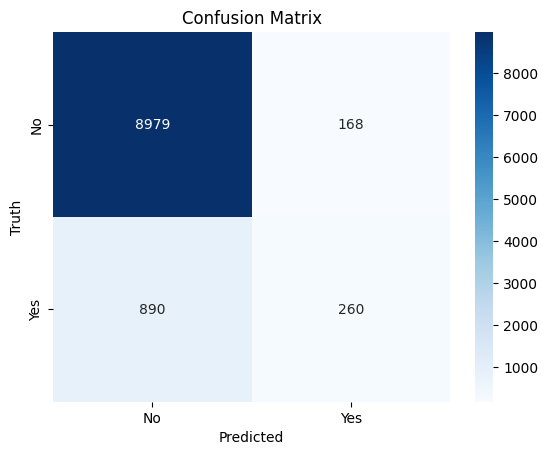

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test4, y_pred4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9147
           1       0.61      0.23      0.33      1150

    accuracy                           0.90     10297
   macro avg       0.76      0.60      0.64     10297
weighted avg       0.88      0.90      0.88     10297



# Decision tree before the feature selection

70 - 30 ratio

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train1,y_train1)

In [ ]:
y_pred1 = clf.predict(X_test1)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.8888888888888888


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.9021607186210245


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.9079873755765963


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.910091446143886


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1,y_pred1)
cm

array([[10584,   343],
       [  768,   662]])

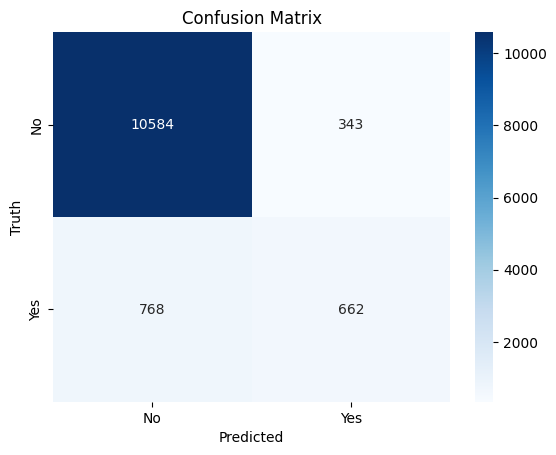

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=24)

# Train Decision Tree Classifer
clf = clf.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.8875131504410455


In [ ]:
#Predict the response for train dataset
y_pred_train1 = clf.predict(X_train1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train1, y_pred_train1))

Accuracy: 0.9997225208976449


60 - 40 ratio

In [ ]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train3,y_train3)

In [ ]:
y_pred3 = clf.predict(X_test3)
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.8868657441126487


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train3,y_train3)

#Predict the response for test dataset
y_pred33 = clf.predict(X_test3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.8868657441126487


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train3,y_train3)

#Predict the response for test dataset
y_pred33 = clf.predict(X_test3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.8868657441126487


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train3,y_train3)

#Predict the response for test dataset
y_pred3 = clf.predict(X_test3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.9129643117261471


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test3,y_pred3)
cm

array([[14087,   508],
       [  926,   955]])

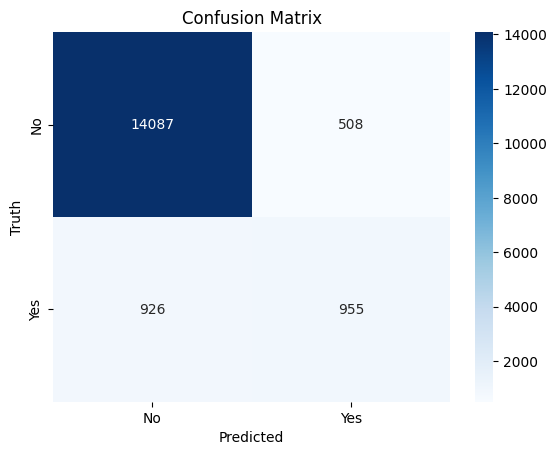

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=24)

# Train Decision Tree Classifer
clf = clf.fit(X_train3,y_train3)

#Predict the response for test dataset
y_pred33 = clf.predict(X_test3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred33))

Accuracy: 0.888443797038116


In [ ]:
#Predict the response for train dataset
y_pred_train3 = clf.predict(X_train3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train3, y_pred_train3))

Accuracy: 0.9989074134023956


80 - 20 ratio

In [ ]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train2,y_train2)

In [ ]:
y_pred2 = clf.predict(X_test2)
y_pred2

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8902646273367322


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.903495994173343


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.9060451565914057


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.9149065307113377


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2,y_pred2)
cm

array([[7048,  282],
       [ 419,  489]])

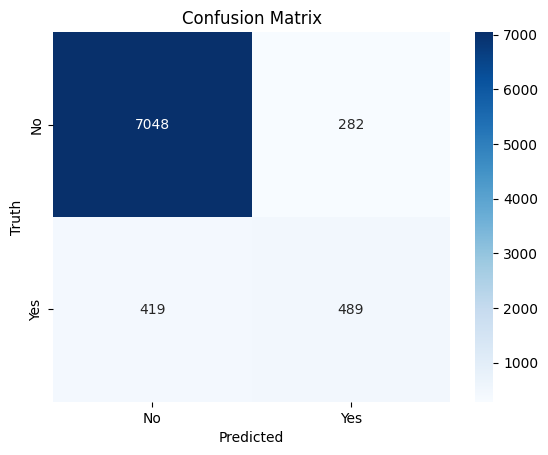

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=24)

# Train Decision Tree Classifer
clf = clf.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8915999028890508


In [ ]:
#Predict the response for train dataset
y_pred_train2 = clf.predict(X_train2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train2, y_pred_train2))

Accuracy: 0.9995447647951442


75 - 25 ratio

In [ ]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train4,y_train4)

In [ ]:
y_pred4 = clf.predict(X_test4)
y_pred4

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.8901621831601437


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train4,y_train4)

#Predict the response for test dataset
y_pred4 = clf.predict(X_test4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.9044381858793823


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train4,y_train4)

#Predict the response for test dataset
y_pred4 = clf.predict(X_test4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.9092939691172186


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train4,y_train4)

#Predict the response for test dataset
y_pred4 = clf.predict(X_test4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.9130814800427309


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test4,y_pred4)
cm

array([[8790,  357],
       [ 538,  612]])

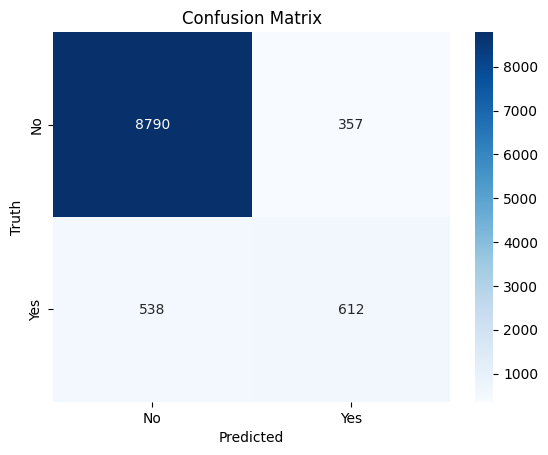

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test4,y_pred4)
cm

array([[8790,  357],
       [ 538,  612]])

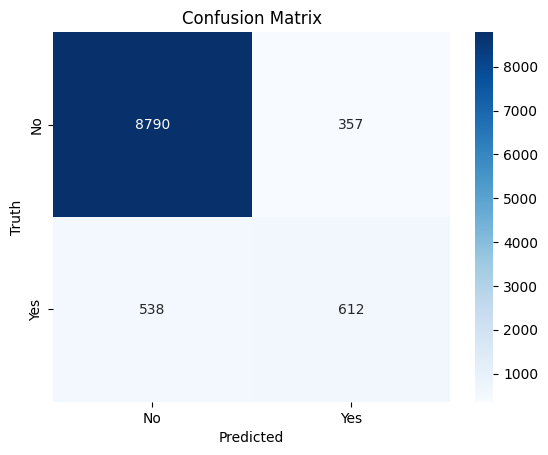

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=24)

# Train Decision Tree Classifer
clf = clf.fit(X_train4,y_train4)

#Predict the response for test dataset
y_pred4 = clf.predict(X_test4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.8896766048363601


In [ ]:
#Predict the response for train dataset
y_pred_train4 = clf.predict(X_train4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train4, y_pred_train4))

Accuracy: 0.9996115373409731




---



# **BAGGING - Random Forest before the feature selection**

70 - 30 ratio

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train1, y_train1)

RandomForestClassifier()

In [ ]:
y_pred1 = rf.predict(X_test1)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.911143481427531


In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10927
           1       0.66      0.47      0.55      1430

    accuracy                           0.91     12357
   macro avg       0.80      0.72      0.75     12357
weighted avg       0.90      0.91      0.90     12357



In [ ]:
cm = confusion_matrix(y_test1, y_pred1)
cm

array([[10582,   345],
       [  753,   677]])

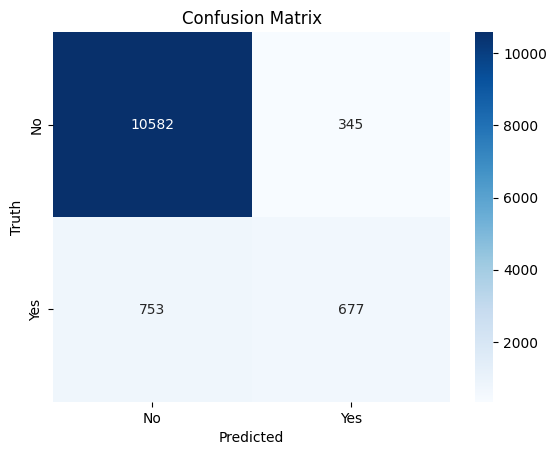

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

60 - 40 ratio

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train3, y_train3)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_test3)
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14595
           1       0.66      0.49      0.56      1881

    accuracy                           0.91     16476
   macro avg       0.80      0.73      0.76     16476
weighted avg       0.90      0.91      0.91     16476



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.9126001456664239


In [ ]:
cm =confusion_matrix(y_test3, y_pred3)
cm

array([[14113,   482],
       [  958,   923]])

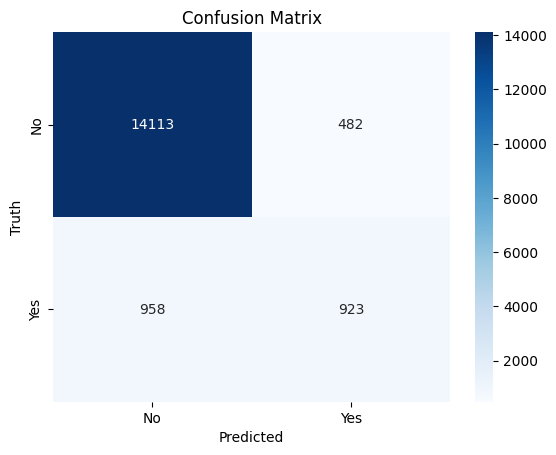

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

80 - 20 ratio

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train2, y_train2)

RandomForestClassifier()

In [ ]:
y_pred2 = rf.predict(X_test2)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7330
           1       0.64      0.50      0.56       908

    accuracy                           0.91      8238
   macro avg       0.79      0.73      0.76      8238
weighted avg       0.91      0.91      0.91      8238



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.9139354212187424


In [ ]:
cm = confusion_matrix(y_test2, y_pred2)
cm

array([[7075,  255],
       [ 454,  454]])

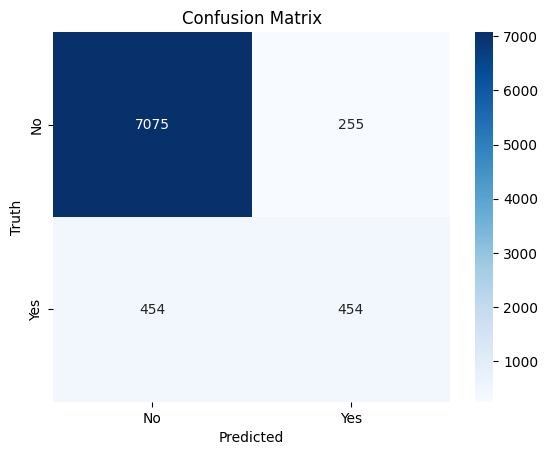

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

75 - 25 ratio

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train4, y_train4)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test4)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
print(classification_report(y_test4, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9147
           1       0.51      0.51      0.51      1150

    accuracy                           0.89     10297
   macro avg       0.72      0.73      0.72     10297
weighted avg       0.89      0.89      0.89     10297



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.8896766048363601


In [ ]:
cm =confusion_matrix(y_test4, y_pred4)
cm

array([[8569,  578],
       [ 558,  592]])

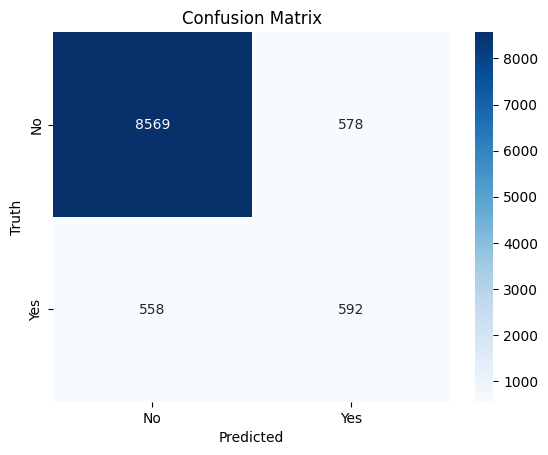

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# **Boosting before the feature selection**

 XG - BOOST

70- 30 ratio

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier()

model = model.fit(X_train1, y_train1)

In [ ]:
from sklearn import metrics

y_pred1 = model.predict(X_test1)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10927
           1       0.65      0.53      0.58      1430

    accuracy                           0.91     12357
   macro avg       0.79      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.9120336651290767


In [ ]:
cm = confusion_matrix(y_test1, y_pred1)
cm

array([[10514,   413],
       [  674,   756]])

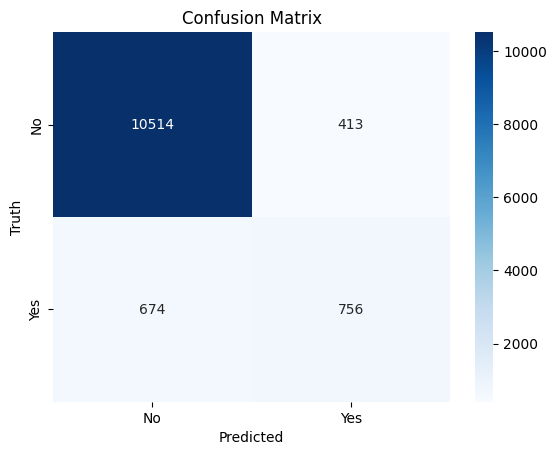

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

60 - 40 ratio

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier()

model = model.fit(X_train3, y_train3)

In [ ]:
from sklearn import metrics

y_pred3 = model.predict(X_test3)
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14595
           1       0.64      0.54      0.59      1881

    accuracy                           0.91     16476
   macro avg       0.79      0.75      0.77     16476
weighted avg       0.91      0.91      0.91     16476



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.9131463947560088


In [ ]:
cm = confusion_matrix(y_test3, y_pred3)
cm

array([[14033,   562],
       [  869,  1012]])

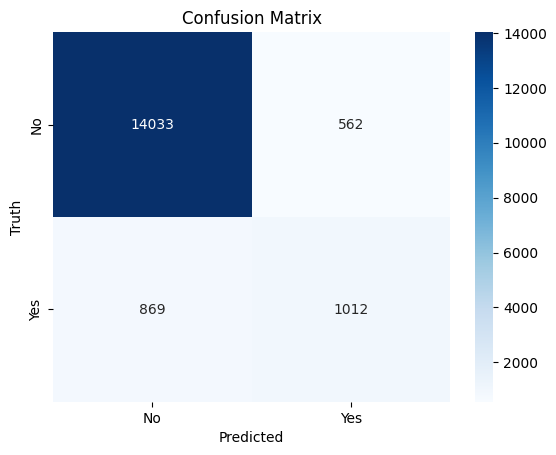

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

80 - 20 ratio

In [ ]:
model = xgb.XGBClassifier()

model = model.fit(X_train2, y_train2)

In [ ]:
from sklearn import metrics

y_pred2 = model.predict(X_test2)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7330
           1       0.63      0.55      0.58       908

    accuracy                           0.91      8238
   macro avg       0.79      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.9141781985918912


In [ ]:
cm = confusion_matrix(y_test2, y_pred2)
cm

array([[7033,  297],
       [ 410,  498]])

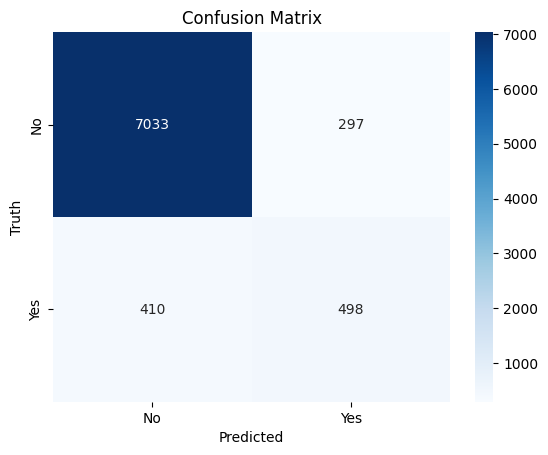

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

75 - 25 ratio

In [ ]:
model = xgb.XGBClassifier()

model = model.fit(X_train4, y_train4)

In [ ]:
from sklearn import metrics

y_pred4 = model.predict(X_test4)
y_pred4

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test4, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9147
           1       0.63      0.55      0.59      1150

    accuracy                           0.91     10297
   macro avg       0.79      0.76      0.77     10297
weighted avg       0.91      0.91      0.91     10297



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.9133728270370011


In [ ]:
cm = confusion_matrix(y_test4, y_pred4)
cm

array([[8771,  376],
       [ 516,  634]])

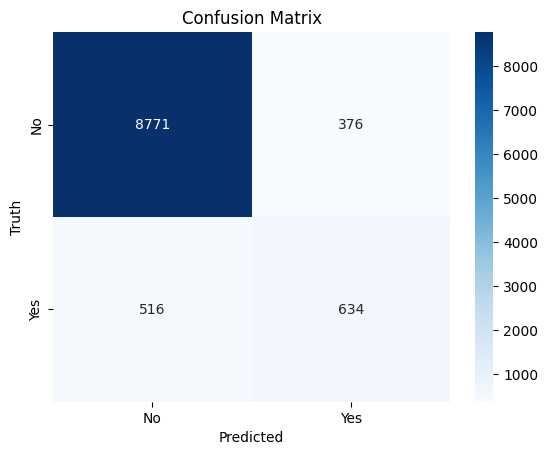

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

**ADAboost**

70 - 30 ratio

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize the AdaBoost classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the model on the training data
model.fit(X_train1, y_train1)

# Predict on the test data
y_pred1 = model.predict(X_test1)

# Calculate the accuracy
accuracy = accuracy_score(y_test1, y_pred1)
print(f"Accuracy: {accuracy:.5f}")
print(classification_report(y_test1, y_pred1))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.90637
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10927
           1       0.66      0.40      0.50      1430

    accuracy                           0.91     12357
   macro avg       0.79      0.69      0.72     12357
weighted avg       0.89      0.91      0.90     12357



In [ ]:
cm = confusion_matrix(y_test1, y_pred1)
cm

array([[10624,   303],
       [  854,   576]])

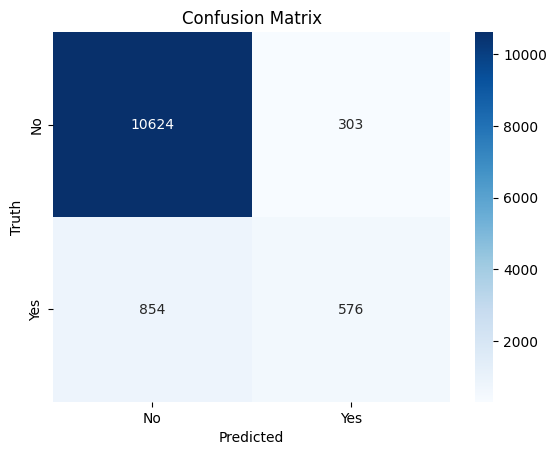

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

60- 40 ratio

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the model on the training data
model.fit(X_train3, y_train3)

# Predict on the test data
y_pred3 = model.predict(X_test3)

# Calculate the accuracy
accuracy = accuracy_score(y_test3, y_pred3)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test3, y_pred3))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.907
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     14595
           1       0.66      0.38      0.48      1881

    accuracy                           0.91     16476
   macro avg       0.79      0.68      0.72     16476
weighted avg       0.89      0.91      0.90     16476



In [ ]:
cm = confusion_matrix(y_test3, y_pred3)
cm

array([[14218,   377],
       [ 1161,   720]])

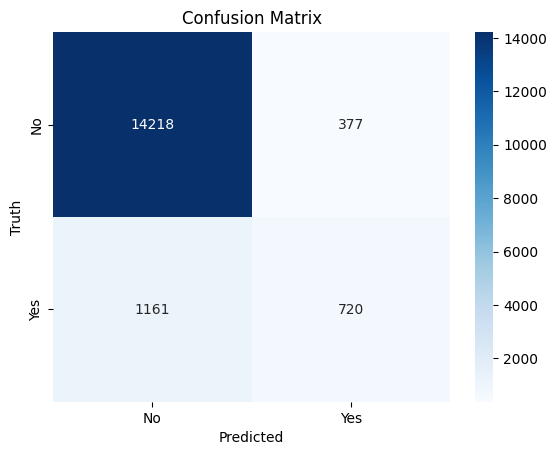

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

80 - 20 ratio

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


# Initialize the AdaBoost classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the model on the training data
model.fit(X_train2, y_train2)

# Predict on the test data
y_pred2 = model.predict(X_test2)

# Calculate the accuracy
accuracy = accuracy_score(y_test2, y_pred2)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test2, y_pred2))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.907
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7330
           1       0.62      0.39      0.48       908

    accuracy                           0.91      8238
   macro avg       0.78      0.68      0.71      8238
weighted avg       0.89      0.91      0.90      8238



In [ ]:
cm = confusion_matrix(y_test2, y_pred2)
cm

array([[7117,  213],
       [ 554,  354]])

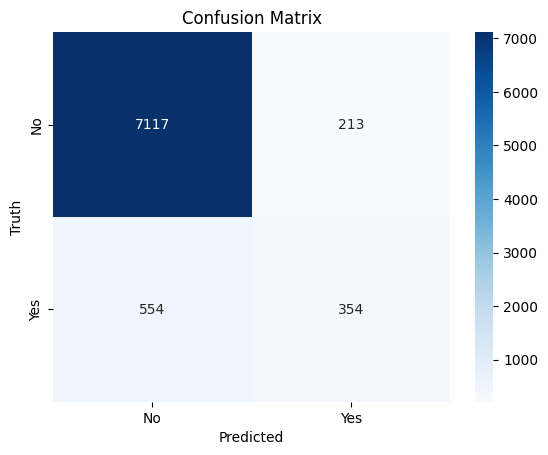

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

75 - 25 ratio

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


# Initialize the AdaBoost classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the model on the training data
model.fit(X_train4, y_train4)

# Predict on the test data
y_pred4 = model.predict(X_test4)

# Calculate the accuracy
accuracy = accuracy_score(y_test4, y_pred4)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test4, y_pred4))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.909
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9147
           1       0.65      0.40      0.49      1150

    accuracy                           0.91     10297
   macro avg       0.79      0.69      0.72     10297
weighted avg       0.90      0.91      0.90     10297



In [ ]:
cm = confusion_matrix(y_test4, y_pred4)
cm

array([[8903,  244],
       [ 692,  458]])

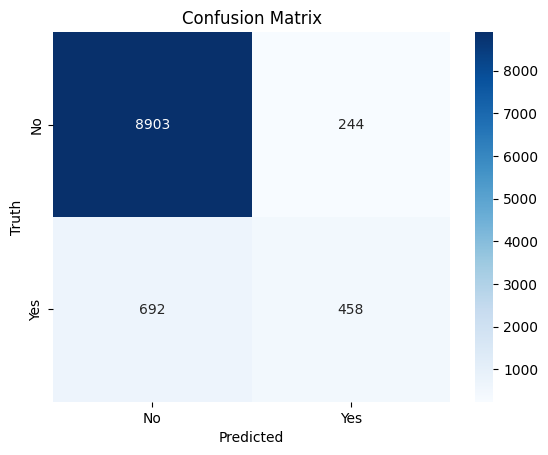

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()



---



# ANN before the feature selection

70 - 30

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train1, y_train1, epochs= 100)

Epoch 1/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - a=recall: 0.0159 - accuracy: 0.8903 - loss: 0.4507 - precision: 0.2701
Epoch 2/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8930 - loss: 0.3402 - precision: 0.0000e+00
Epoch 3/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8930 - loss: 0.3402 - precision: 0.0000e+00
Epoch 4/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8930 - loss: 0.3402 - precision: 0.0000e+00
Epoch 5/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - a=recall: 0.0000e+00 - accuracy: 0.8930 - loss: 0.3402 - precision: 0.0000e+00
Epoch 6/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8930 - loss: 0.3402 - precision: 0.0000e+00
Epoch 7/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8930 - loss: 0.3402 - precision: 0.0000e+00
Epoch 8/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.000

In [ ]:
model.evaluate(X_test1, y_test1)

387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - a=recall: 0.0000e+00 - accuracy: 0.8862 - loss: 0.3543 - precision: 0.0000e+00


[0.35968470573425293, 0.8836287260055542, 0.0, 0.0]

<Axes: >

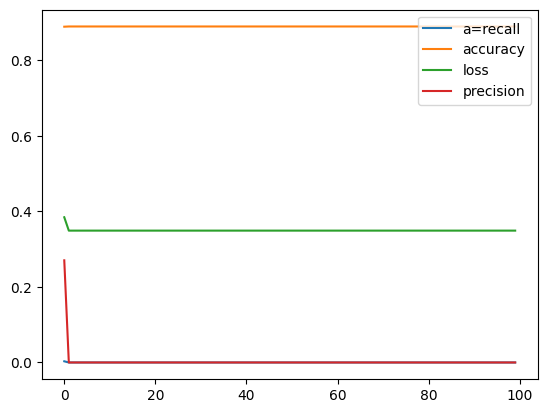

In [ ]:
pd.DataFrame(history.history).plot()

80 - 20

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train2, y_train2, epochs= 100)

Epoch 1/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - a=recall: 0.1969 - accuracy: 0.8656 - loss: 4.2683 - precision: 0.3769
Epoch 2/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.4285 - accuracy: 0.9005 - loss: 0.2501 - precision: 0.5785
Epoch 3/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - a=recall: 0.4762 - accuracy: 0.8987 - loss: 0.2297 - precision: 0.5583
Epoch 4/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - a=recall: 0.5127 - accuracy: 0.8989 - loss: 0.2253 - precision: 0.5552
Epoch 5/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.5458 - accuracy: 0.8980 - loss: 0.2256 - precision: 0.5470
Epoch 6/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.5398 - accuracy: 0.8975 - loss: 0.2251 - precision: 0.5450
Epoch 7/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.5086 - accuracy: 0.8928 - loss: 0.2358 - precision: 0.5242
Epoch 8/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - a=recall: 0.5576 - accuracy: 0.8976 - loss: 0.2

In [ ]:
model.evaluate(X_test2, y_test2)

258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - a=recall: 0.0000e+00 - accuracy: 0.8855 - loss: 0.3558 - precision: 0.0000e+00


[0.3477849066257477, 0.88941490650177, 0.0, 0.0]

<Axes: >

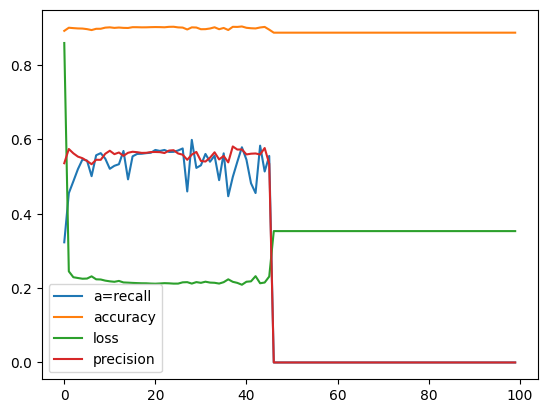

In [ ]:
pd.DataFrame(history.history).plot()

60 - 40

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train3, y_train3, epochs= 100)

Epoch 1/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - a=recall: 0.1050 - accuracy: 0.8747 - loss: 0.9613 - precision: 0.3426
Epoch 2/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8861 - loss: 0.3547 - precision: 0.0000e+00
Epoch 3/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8861 - loss: 0.3547 - precision: 0.0000e+00
Epoch 4/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8861 - loss: 0.3547 - precision: 0.0000e+00
Epoch 5/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - a=recall: 0.0000e+00 - accuracy: 0.8861 - loss: 0.3547 - precision: 0.0000e+00
Epoch 6/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - a=recall: 0.0000e+00 - accuracy: 0.8861 - loss: 0.3547 - precision: 0.0000e+00
Epoch 7/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8861 - loss: 0.3547 - precision: 0.0000e+00
Epoch 8/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.000

In [ ]:
model.evaluate(X_test3, y_test3)

515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8891 - loss: 0.3490 - precision: 0.0000e+00


[0.35187411308288574, 0.8876547813415527, 0.0, 0.0]

<Axes: >

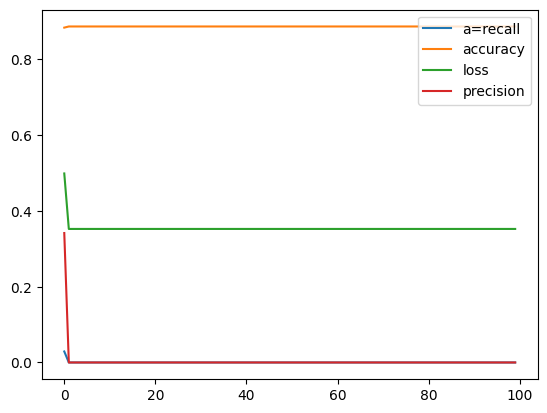

In [ ]:
pd.DataFrame(history.history).plot()

75 - 25

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train4, y_train4, epochs= 100)

Epoch 1/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - a=recall: 0.0751 - accuracy: 0.8328 - loss: 2.6831 - precision: 0.1138
Epoch 2/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - a=recall: 0.0000e+00 - accuracy: 0.8893 - loss: 0.3481 - precision: 0.0000e+00
Epoch 3/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - a=recall: 0.0000e+00 - accuracy: 0.8893 - loss: 0.3481 - precision: 0.0000e+00
Epoch 4/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - a=recall: 0.0000e+00 - accuracy: 0.8893 - loss: 0.3481 - precision: 0.0000e+00
Epoch 5/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8893 - loss: 0.3481 - precision: 0.0000e+00
Epoch 6/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8893 - loss: 0.3482 - precision: 0.0000e+00
Epoch 7/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8893 - loss: 0.3482 - precision: 0.0000e+00
Epoch 8/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - a=recall: 0.000

In [ ]:
model.evaluate(X_test4, y_test4)

322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8874 - loss: 0.3521 - precision: 0.0000e+00


[0.3496861159801483, 0.8885112404823303, 0.0, 0.0]

<Axes: >

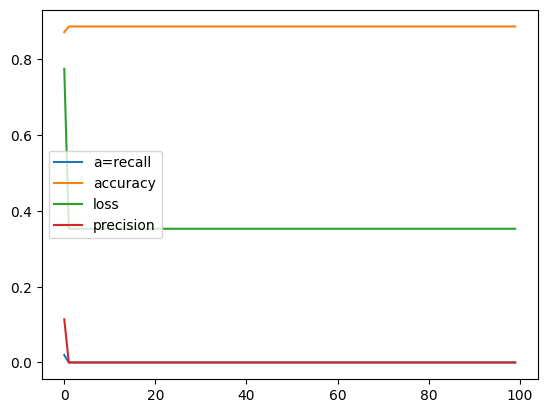

In [ ]:
pd.DataFrame(history.history).plot()

# Feature selection - Multicollinearity

In [ ]:
# create X and y

X=data_encoded.drop(['Y'],axis=1)
y = data_encoded['Y']

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i).round(1) for i in range(X.shape[1])]

    return(vif)

calc_vif(X)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


variables      VIF
0                             Age     21.8
1                        Duration      2.0
2                        Campaign      1.9
3                           pdays    341.0
4                        Previous      6.6
5                    emp_var_rate     61.0
6                  cons_price_idx  39102.3
7                   cons_conf_idx    165.7
8                       euribor3m    480.6
9                     nr_employed  46677.4
10                Martial_married    313.0
11                 Martial_single    145.9
12               Martial_divorced     58.7
13                Default_unknown      1.4
14                    Default_yes      1.0
15                    Housing_yes      inf
16                     Housing_no      inf
17                       Loan_yes      inf
18                        Loan_no      inf
19              Contact_telephone      5.1
20           poutcome_nonexistent     37.3
21               poutcome_success     11.5
22       Job_category_low_earning      1.5
23  Job_category_moderate_earning      2.7
24    Education_category_high_edu      4.4
25     Education_category_med_edu      3.7
26      Education_category_no_edu      1.3
27              Month_category_Q2     42.6
28              Month_category_Q3     29.2
29              Month_category_Q4     11.9

In [ ]:
calc_vif(X.drop(['Housing_yes'], axis=1))

variables      VIF
0                             Age     21.8
1                        Duration      2.0
2                        Campaign      1.9
3                           pdays    341.0
4                        Previous      6.6
5                    emp_var_rate     61.0
6                  cons_price_idx  39102.3
7                   cons_conf_idx    165.7
8                       euribor3m    480.6
9                     nr_employed  46677.4
10                Martial_married    313.0
11                 Martial_single    145.9
12               Martial_divorced     58.7
13                Default_unknown      1.4
14                    Default_yes      1.0
15                     Housing_no      1.9
16                       Loan_yes      7.4
17                        Loan_no     36.1
18              Contact_telephone      5.1
19           poutcome_nonexistent     37.3
20               poutcome_success     11.5
21       Job_category_low_earning      1.5
22  Job_category_moderate_earning      2.7
23    Education_category_high_edu      4.4
24     Education_category_med_edu      3.7
25      Education_category_no_edu      1.3
26              Month_category_Q2     42.6
27              Month_category_Q3     29.2
28              Month_category_Q4     11.9

In [ ]:
calc_vif(X.drop(['Housing_yes','nr_employed'], axis=1))

variables     VIF
0                             Age    21.8
1                        Duration     2.0
2                        Campaign     1.9
3                           pdays   339.4
4                        Previous     6.5
5                    emp_var_rate    33.4
6                  cons_price_idx  1484.5
7                   cons_conf_idx   135.1
8                       euribor3m   187.2
9                 Martial_married   312.4
10                 Martial_single   145.6
11               Martial_divorced    58.6
12                Default_unknown     1.4
13                    Default_yes     1.0
14                     Housing_no     1.9
15                       Loan_yes     7.4
16                        Loan_no    36.1
17              Contact_telephone     4.3
18           poutcome_nonexistent    36.9
19               poutcome_success    11.5
20       Job_category_low_earning     1.5
21  Job_category_moderate_earning     2.7
22    Education_category_high_edu     4.4
23     Education_category_med_edu     3.7
24      Education_category_no_edu     1.3
25              Month_category_Q2    42.6
26              Month_category_Q3    29.1
27              Month_category_Q4    11.6

In [ ]:
calc_vif(X.drop(['Housing_yes','nr_employed','cons_price_idx'], axis=1))

variables    VIF
0                             Age   21.3
1                        Duration    2.0
2                        Campaign    1.9
3                           pdays  256.2
4                        Previous    5.4
5                    emp_var_rate   28.6
6                   cons_conf_idx  107.8
7                       euribor3m  158.7
8                 Martial_married  207.5
9                  Martial_single   96.0
10               Martial_divorced   39.5
11                Default_unknown    1.4
12                    Default_yes    1.0
13                     Housing_no    1.9
14                       Loan_yes    7.3
15                        Loan_no   35.2
16              Contact_telephone    4.1
17           poutcome_nonexistent   33.1
18               poutcome_success    8.7
19       Job_category_low_earning    1.5
20  Job_category_moderate_earning    2.7
21    Education_category_high_edu    4.4
22     Education_category_med_edu    3.7
23      Education_category_no_edu    1.3
24              Month_category_Q2   41.3
25              Month_category_Q3   27.6
26              Month_category_Q4   11.5

In [ ]:
calc_vif(X.drop(['Housing_yes','nr_employed','cons_price_idx','pdays'], axis=1))

variables    VIF
0                             Age   21.0
1                        Duration    2.0
2                        Campaign    1.9
3                        Previous    5.3
4                    emp_var_rate   26.2
5                   cons_conf_idx   95.6
6                       euribor3m  145.3
7                 Martial_married  173.3
8                  Martial_single   79.8
9                Martial_divorced   33.2
10                Default_unknown    1.4
11                    Default_yes    1.0
12                     Housing_no    1.9
13                       Loan_yes    7.2
14                        Loan_no   34.9
15              Contact_telephone    4.1
16           poutcome_nonexistent   32.9
17               poutcome_success    1.5
18       Job_category_low_earning    1.5
19  Job_category_moderate_earning    2.7
20    Education_category_high_edu    4.4
21     Education_category_med_edu    3.7
22      Education_category_no_edu    1.3
23              Month_category_Q2   40.7
24              Month_category_Q3   27.0
25              Month_category_Q4   11.4

In [ ]:
calc_vif(X.drop(['Housing_yes','nr_employed','cons_price_idx','pdays','Martial_married'], axis=1))

variables    VIF
0                             Age   20.3
1                        Duration    2.0
2                        Campaign    1.9
3                        Previous    4.9
4                    emp_var_rate   18.6
5                   cons_conf_idx   64.9
6                       euribor3m  105.5
7                  Martial_single    1.8
8                Martial_divorced    1.2
9                 Default_unknown    1.4
10                    Default_yes    1.0
11                     Housing_no    1.9
12                       Loan_yes    7.0
13                        Loan_no   33.9
14              Contact_telephone    4.0
15           poutcome_nonexistent   31.0
16               poutcome_success    1.5
17       Job_category_low_earning    1.5
18  Job_category_moderate_earning    2.7
19    Education_category_high_edu    4.3
20     Education_category_med_edu    3.7
21      Education_category_no_edu    1.3
22              Month_category_Q2   39.1
23              Month_category_Q3   25.2
24              Month_category_Q4   11.3

In [ ]:
calc_vif(X.drop(['Housing_yes','nr_employed','cons_price_idx','pdays','Martial_married','euribor3m'], axis=1))

variables   VIF
0                             Age  19.4
1                        Duration   2.0
2                        Campaign   1.9
3                        Previous   4.9
4                    emp_var_rate   2.2
5                   cons_conf_idx  63.7
6                  Martial_single   1.8
7                Martial_divorced   1.2
8                 Default_unknown   1.4
9                     Default_yes   1.0
10                     Housing_no   1.9
11                       Loan_yes   6.7
12                        Loan_no  32.1
13              Contact_telephone   3.8
14           poutcome_nonexistent  30.2
15               poutcome_success   1.5
16       Job_category_low_earning   1.5
17  Job_category_moderate_earning   2.7
18    Education_category_high_edu   4.2
19     Education_category_med_edu   3.6
20      Education_category_no_edu   1.3
21              Month_category_Q2  32.5
22              Month_category_Q3  19.7
23              Month_category_Q4   7.5

In [ ]:
calc_vif(X.drop(['Housing_yes','nr_employed','cons_price_idx','pdays','Martial_married','euribor3m','cons_conf_idx'], axis=1))

variables   VIF
0                             Age  18.8
1                        Duration   2.0
2                        Campaign   1.9
3                        Previous   4.6
4                    emp_var_rate   2.2
5                  Martial_single   1.7
6                Martial_divorced   1.2
7                 Default_unknown   1.4
8                     Default_yes   1.0
9                      Housing_no   1.9
10                       Loan_yes   6.1
11                        Loan_no  28.8
12              Contact_telephone   3.4
13           poutcome_nonexistent  27.9
14               poutcome_success   1.5
15       Job_category_low_earning   1.5
16  Job_category_moderate_earning   2.6
17    Education_category_high_edu   4.2
18     Education_category_med_edu   3.5
19      Education_category_no_edu   1.3
20              Month_category_Q2  25.0
21              Month_category_Q3  17.3
22              Month_category_Q4   6.4

In [ ]:
calc_vif(X.drop(['Housing_yes','nr_employed','cons_price_idx','pdays','Martial_married','euribor3m','cons_conf_idx','Loan_no'], axis=1))

variables   VIF
0                             Age  18.0
1                        Duration   2.0
2                        Campaign   1.9
3                        Previous   4.4
4                    emp_var_rate   2.2
5                  Martial_single   1.7
6                Martial_divorced   1.2
7                 Default_unknown   1.4
8                     Default_yes   1.0
9                      Housing_no   1.8
10                       Loan_yes   1.2
11              Contact_telephone   3.4
12           poutcome_nonexistent  26.2
13               poutcome_success   1.5
14       Job_category_low_earning   1.5
15  Job_category_moderate_earning   2.6
16    Education_category_high_edu   4.1
17     Education_category_med_edu   3.5
18      Education_category_no_edu   1.3
19              Month_category_Q2  20.7
20              Month_category_Q3  14.5
21              Month_category_Q4   5.4

In [ ]:
calc_vif(X.drop(['Housing_yes','nr_employed','cons_price_idx','pdays','Martial_married','euribor3m','cons_conf_idx','Loan_no','poutcome_nonexistent'], axis=1))

variables   VIF
0                             Age  16.9
1                        Duration   2.0
2                        Campaign   1.9
3                        Previous   1.8
4                    emp_var_rate   2.2
5                  Martial_single   1.7
6                Martial_divorced   1.2
7                 Default_unknown   1.4
8                     Default_yes   1.0
9                      Housing_no   1.8
10                       Loan_yes   1.2
11              Contact_telephone   3.3
12               poutcome_success   1.5
13       Job_category_low_earning   1.5
14  Job_category_moderate_earning   2.6
15    Education_category_high_edu   4.0
16     Education_category_med_edu   3.4
17      Education_category_no_edu   1.3
18              Month_category_Q2  15.1
19              Month_category_Q3  10.2
20              Month_category_Q4   4.1

In [ ]:
calc_vif(X.drop(['Housing_yes','nr_employed','cons_price_idx','pdays','Martial_married','euribor3m','cons_conf_idx','Loan_no','poutcome_nonexistent','Age'], axis=1))

variables  VIF
0                        Duration  2.0
1                        Campaign  1.9
2                        Previous  1.8
3                    emp_var_rate  2.1
4                  Martial_single  1.5
5                Martial_divorced  1.2
6                 Default_unknown  1.4
7                     Default_yes  1.0
8                      Housing_no  1.8
9                        Loan_yes  1.2
10              Contact_telephone  3.3
11               poutcome_success  1.5
12       Job_category_low_earning  1.4
13  Job_category_moderate_earning  2.6
14    Education_category_high_edu  4.0
15     Education_category_med_edu  3.4
16      Education_category_no_edu  1.3
17              Month_category_Q2  8.7
18              Month_category_Q3  5.3
19              Month_category_Q4  2.4

In [ ]:
#30 variables to 19 variables at last
calc_vif(X.drop(['Housing_yes','nr_employed','cons_price_idx','pdays','Martial_married','euribor3m','cons_conf_idx','Loan_no','poutcome_nonexistent','Age','Month_category_Q2'], axis=1))

variables  VIF
0                        Duration  1.9
1                        Campaign  1.8
2                        Previous  1.8
3                    emp_var_rate  2.0
4                  Martial_single  1.5
5                Martial_divorced  1.2
6                 Default_unknown  1.3
7                     Default_yes  1.0
8                      Housing_no  1.8
9                        Loan_yes  1.2
10              Contact_telephone  2.7
11               poutcome_success  1.5
12       Job_category_low_earning  1.4
13  Job_category_moderate_earning  2.2
14    Education_category_high_edu  2.8
15     Education_category_med_edu  2.5
16      Education_category_no_edu  1.2
17              Month_category_Q3  2.7
18              Month_category_Q4  1.3

In [ ]:
import statsmodels.api as sm

# Verify the columns in X
print("Columns in X:", X.columns)

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Fit the Logistic Regression model
model = sm.Logit(y, X).fit()

# Print the summary to get p-values and model details
print(model.summary())

Columns in X: Index(['Age', 'Duration', 'Campaign', 'pdays', 'Previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'Martial_married', 'Martial_single', 'Martial_divorced',
       'Default_unknown', 'Default_yes', 'Housing_yes', 'Housing_no',
       'Loan_yes', 'Loan_no', 'Contact_telephone', 'poutcome_nonexistent',
       'poutcome_success', 'Job_category_low_earning',
       'Job_category_moderate_earning', 'Education_category_high_edu',
       'Education_category_med_edu', 'Education_category_no_edu',
       'Month_category_Q2', 'Month_category_Q3', 'Month_category_Q4'],
      dtype='object')
Optimization terminated successfully.
         Current function value: 0.209341
         Iterations 21
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41158
Method:

In [ ]:
#new train
X_new = X.drop(['Housing_yes','nr_employed','cons_price_idx','pdays','Martial_married','euribor3m','cons_conf_idx','Loan_no','poutcome_nonexistent','Age','Month_category_Q2'], axis=1)

In [ ]:
import statsmodels.api as sm

# Verify the columns in X
print("Columns in X_new:", X_new.columns)

# Add a constant to the model (intercept term)
X_new = sm.add_constant(X_new)

# Fit the Logistic Regression model
model = sm.Logit(y, X_new).fit()

# Print the summary to get p-values and model details
print(model.summary())

Columns in X_new: Index(['const', 'Duration', 'Campaign', 'Previous', 'emp_var_rate',
       'Martial_single', 'Martial_divorced', 'Default_unknown', 'Default_yes',
       'Housing_no', 'Loan_yes', 'Contact_telephone', 'poutcome_success',
       'Job_category_low_earning', 'Job_category_moderate_earning',
       'Education_category_high_edu', 'Education_category_med_edu',
       'Education_category_no_edu', 'Month_category_Q3', 'Month_category_Q4'],
      dtype='object')
         Current function value: 0.222742
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41168
Method:                           MLE   Df Model:                           19
Date:                Tue, 17 Dec 2024   Pseudo R-squ.:                  0.3673
Time:                        13:37:06   Log-Likelihood:        

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "




---



# Splitting the dataset after the feature selection

In [ ]:
from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_new, y, test_size=0.30, train_size=0.70)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_new, y, test_size=0.20, train_size=0.80)
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_new, y, test_size=0.40, train_size=0.60)
X_train8, X_test8, y_train8, y_test8 = train_test_split(X_new, y, test_size=0.25, train_size=0.75)

# Logistic regression

In [ ]:
#70 - 30

# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train5, y_train5)
predictions5 = logreg.predict(X_test5)
print(predictions5)

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
z=confusion_matrix(y_test5, predictions5)
z

array([[10698,   267],
       [  929,   463]])

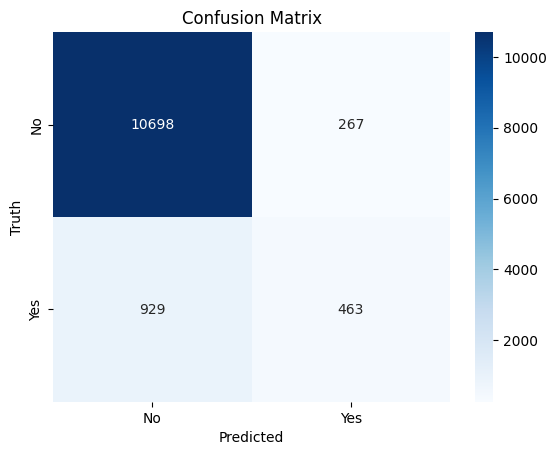

In [ ]:
sns.heatmap(z, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test5,predictions5)

0.9032127539046694

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test5,predictions5))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10965
           1       0.63      0.33      0.44      1392

    accuracy                           0.90     12357
   macro avg       0.78      0.65      0.69     12357
weighted avg       0.89      0.90      0.89     12357



In [ ]:
#80 - 20# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train6, y_train6)
predictions6 = logreg.predict(X_test6)
print(predictions6)

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
z=confusion_matrix(y_test6, predictions6)
z

array([[7095,  181],
       [ 621,  341]])

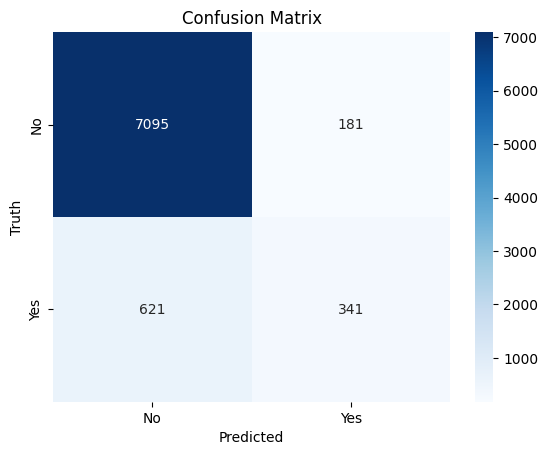

In [ ]:
sns.heatmap(z, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test6,predictions6)

0.9026462733673222

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test6,predictions6))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7276
           1       0.65      0.35      0.46       962

    accuracy                           0.90      8238
   macro avg       0.79      0.66      0.70      8238
weighted avg       0.89      0.90      0.89      8238



In [ ]:
#60 - 40# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train7, y_train7)
predictions7 = logreg.predict(X_test7)
print(predictions7)

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
z=confusion_matrix(y_test7, predictions7)
z

array([[14315,   347],
       [ 1118,   696]])

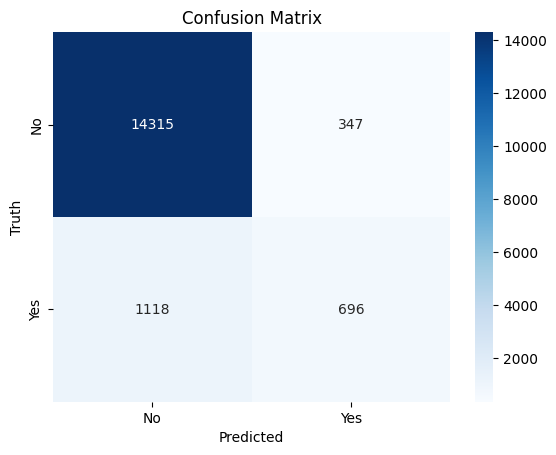

In [ ]:
sns.heatmap(z, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test7,predictions7)

0.9110827870842437

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test7,predictions7))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     14662
           1       0.67      0.38      0.49      1814

    accuracy                           0.91     16476
   macro avg       0.80      0.68      0.72     16476
weighted avg       0.90      0.91      0.90     16476



In [ ]:
#75 - 25

# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train8, y_train8)
predictions8 = logreg.predict(X_test8)
print(predictions8)

[1 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
z=confusion_matrix(y_test8, predictions8)
z

array([[8962,  200],
       [ 752,  383]])

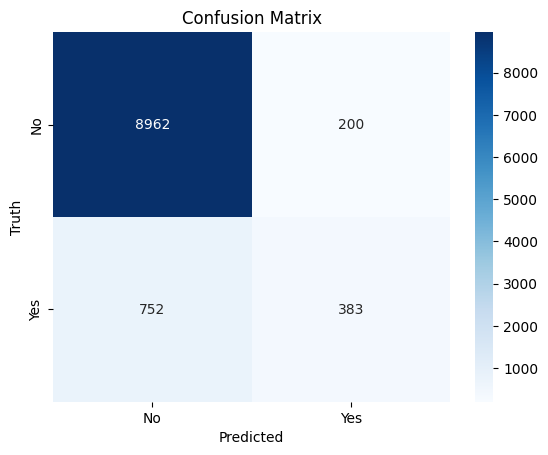

In [ ]:
sns.heatmap(z, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test8,predictions8)

0.9075458871515976

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test8,predictions8))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9162
           1       0.66      0.34      0.45      1135

    accuracy                           0.91     10297
   macro avg       0.79      0.66      0.70     10297
weighted avg       0.89      0.91      0.89     10297





---



# **KNN**

70 - 30 ratio

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)

In [ ]:
model.fit(X_train5,y_train5)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred5 = model.predict(X_test5)
y_pred5

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred5,'Actual':y_test5})
knn

Predicted  Actual
2065           0       0
6387           0       0
11658          0       0
3611           0       0
14337          0       0
...          ...     ...
8197           0       0
19137          1       0
18302          0       0
25830          0       0
6914           0       0

[12357 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import accuracy_score
accuracy_score(y_test5,y_pred5)

0.8934207331876669

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test5,y_pred5)
cm

array([[10722,   243],
       [ 1074,   318]])

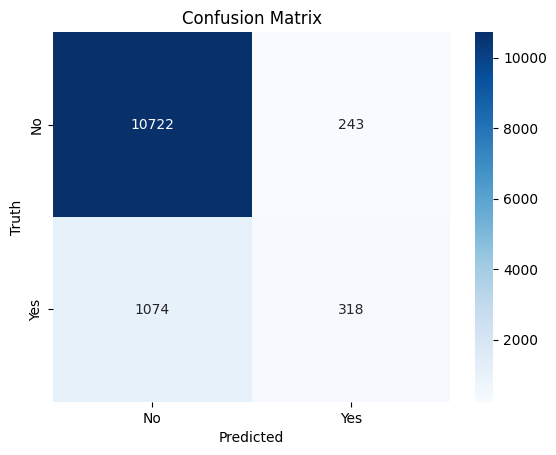

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test5, y_pred5)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10965
           1       0.57      0.23      0.33      1392

    accuracy                           0.89     12357
   macro avg       0.74      0.60      0.63     12357
weighted avg       0.87      0.89      0.87     12357



80-20 ratio

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)
model.fit(X_train6,y_train6)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred6 = model.predict(X_test6)
y_pred6

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred6,'Actual':y_test6})
knn

Predicted  Actual
37433          0       0
17004          0       0
19574          0       0
25921          0       0
35304          0       0
...          ...     ...
25359          0       0
18257          0       0
35145          0       0
4541           0       0
16802          0       0

[8238 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import accuracy_score
accuracy_score(y_test6,y_pred6)

0.8959698956057296

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test6,y_pred6)
cm

array([[7133,  143],
       [ 714,  248]])

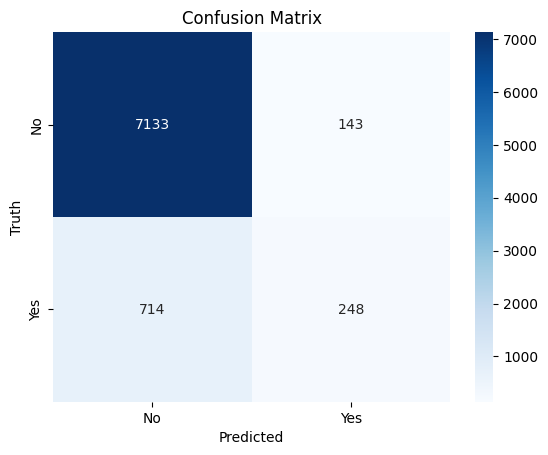

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test6, y_pred6)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7276
           1       0.63      0.26      0.37       962

    accuracy                           0.90      8238
   macro avg       0.77      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238



60 - 40 ratio

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)
model.fit(X_train7,y_train7)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred7 = model.predict(X_test7)
y_pred7

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred7,'Actual':y_test7})
knn

Predicted  Actual
7665           0       0
28041          0       0
528            0       0
37821          0       0
36771          0       0
...          ...     ...
24338          0       0
7512           0       0
20180          0       0
10813          0       0
10970          0       0

[16476 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import accuracy_score
accuracy_score(y_test7,y_pred7)

0.8964554503520272

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test7,y_pred7)
cm

array([[14332,   330],
       [ 1376,   438]])

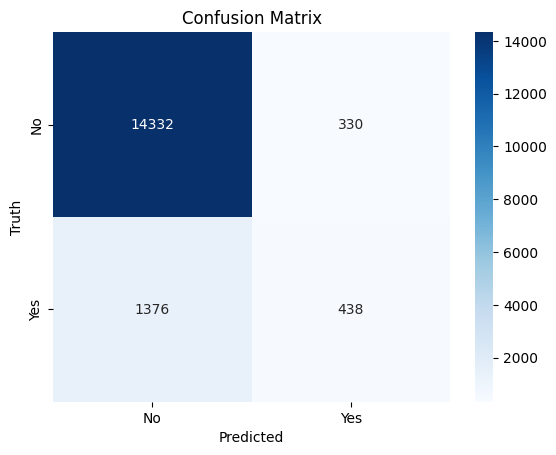

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test7, y_pred7)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     14662
           1       0.57      0.24      0.34      1814

    accuracy                           0.90     16476
   macro avg       0.74      0.61      0.64     16476
weighted avg       0.87      0.90      0.88     16476



75 - 25 ratio

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)
model.fit(X_train8,y_train8)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred8 = model.predict(X_test8)
y_pred8

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred8,'Actual':y_test8})
knn

Predicted  Actual
10447          1       1
15049          0       0
9678           0       0
38941          0       0
15698          0       1
...          ...     ...
38616          0       1
37061          0       1
27279          0       0
26494          0       1
32941          0       0

[10297 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import accuracy_score
accuracy_score(y_test8,y_pred8)

0.9001650966300865

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test8,y_pred8)
cm

array([[8988,  174],
       [ 854,  281]])

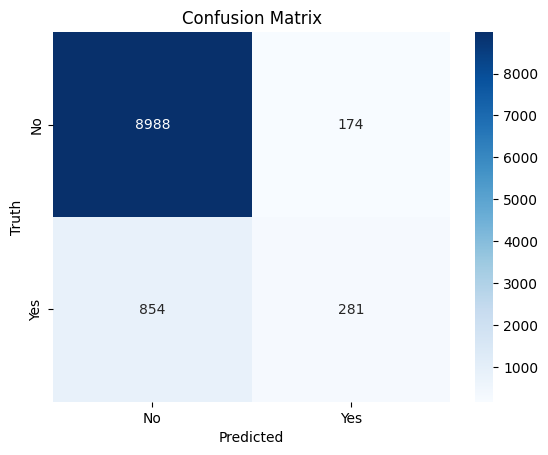

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test8, y_pred8)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      9162
           1       0.62      0.25      0.35      1135

    accuracy                           0.90     10297
   macro avg       0.77      0.61      0.65     10297
weighted avg       0.88      0.90      0.88     10297





---



# **SVM**

70 - 30 ratio

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='rbf')

In [ ]:
model.fit(X_train5, y_train5)

SVC()

In [ ]:
y_pred5 = model.predict(X_test5)
y_pred5

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred5,'Actual':y_test5})
svm

Predicted  Actual
2065           0       0
6387           0       0
11658          0       0
3611           0       0
14337          0       0
...          ...     ...
8197           0       0
19137          1       0
18302          0       0
25830          0       0
6914           0       0

[12357 rows x 2 columns]

In [ ]:
#evaluation metrics
from sklearn.metrics import accuracy_score
accuracy_score(y_test5,y_pred5)

0.8926924010682205

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test5,y_pred5)
cm

array([[10781,   184],
       [ 1142,   250]])

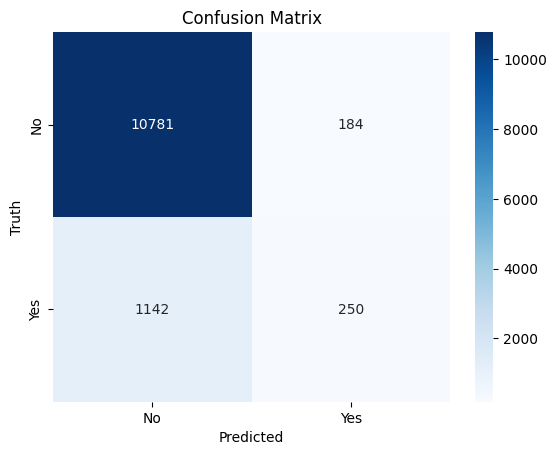

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test5, y_pred5)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10965
           1       0.58      0.18      0.27      1392

    accuracy                           0.89     12357
   macro avg       0.74      0.58      0.61     12357
weighted avg       0.87      0.89      0.87     12357



80 - 20 ratio

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='rbf')

In [ ]:
model.fit(X_train6, y_train6)

SVC()

In [ ]:
y_pred6 = model.predict(X_test6)
y_pred6

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred6,'Actual':y_test6})
svm

Predicted  Actual
37433          0       0
17004          0       0
19574          0       0
25921          0       0
35304          0       0
...          ...     ...
25359          0       0
18257          0       0
35145          0       0
4541           0       0
16802          0       0

[8238 rows x 2 columns]

In [ ]:
#evaluation metrics
from sklearn.metrics import accuracy_score
accuracy_score(y_test6,y_pred6)

0.8897790725904345

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test6,y_pred6)
cm

array([[7163,  113],
       [ 795,  167]])

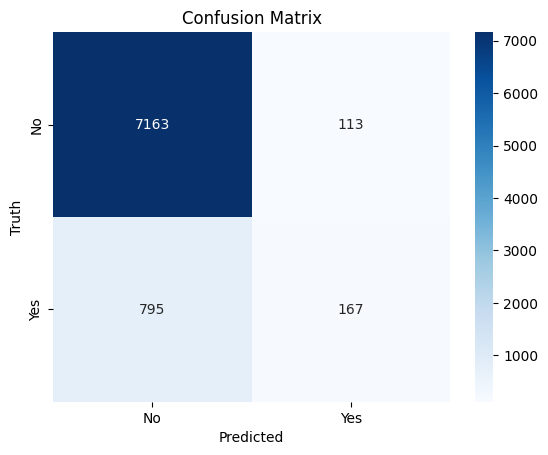

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test6, y_pred6)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7276
           1       0.60      0.17      0.27       962

    accuracy                           0.89      8238
   macro avg       0.75      0.58      0.60      8238
weighted avg       0.86      0.89      0.86      8238



60 - 40 ratio

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='rbf')

In [ ]:
model.fit(X_train7, y_train7)

SVC()

In [ ]:
y_pred7 = model.predict(X_test7)
y_pred7

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred7,'Actual':y_test7})
svm

Predicted  Actual
7665           0       0
28041          0       0
528            0       0
37821          0       0
36771          0       0
...          ...     ...
24338          0       0
7512           0       0
20180          0       0
10813          0       0
10970          0       0

[16476 rows x 2 columns]

In [ ]:
#evaluation metrics
from sklearn.metrics import accuracy_score
accuracy_score(y_test7,y_pred7)

0.8978514202476329

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test7,y_pred7)
cm

array([[14431,   231],
       [ 1452,   362]])

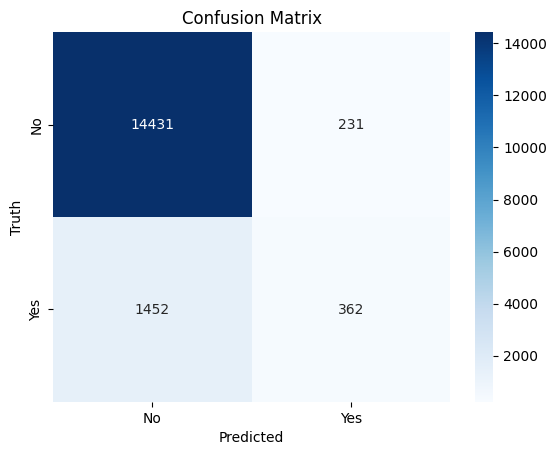

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test7, y_pred7)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     14662
           1       0.61      0.20      0.30      1814

    accuracy                           0.90     16476
   macro avg       0.76      0.59      0.62     16476
weighted avg       0.88      0.90      0.87     16476



75 - 25 ratio

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='rbf')

In [ ]:
model.fit(X_train8, y_train8)

SVC()

In [ ]:
y_pred8 = model.predict(X_test8)
y_pred8

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred8,'Actual':y_test8})
svm

Predicted  Actual
10447          1       1
15049          0       0
9678           0       0
38941          0       0
15698          0       1
...          ...     ...
38616          0       1
37061          0       1
27279          0       0
26494          0       1
32941          0       0

[10297 rows x 2 columns]

In [ ]:
#evaluation metrics
from sklearn.metrics import accuracy_score
accuracy_score(y_test8,y_pred8)

0.8964747013693308

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test8,y_pred8)
cm

array([[9036,  126],
       [ 940,  195]])

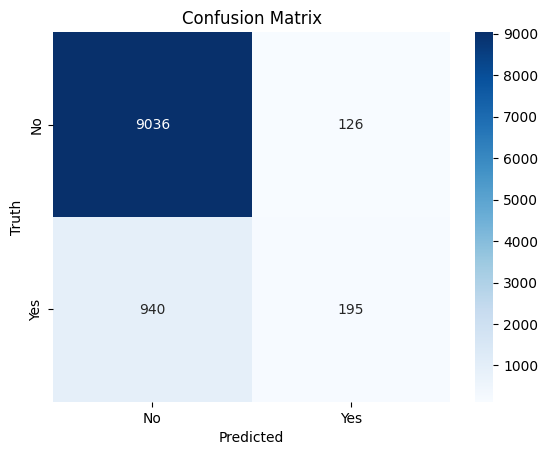

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test8, y_pred8)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      9162
           1       0.61      0.17      0.27      1135

    accuracy                           0.90     10297
   macro avg       0.76      0.58      0.61     10297
weighted avg       0.87      0.90      0.87     10297





---



# **Decision tree**

70 - 30 ratio

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train5,y_train5)

In [ ]:
y_pred5 = clf.predict(X_test5)
y_pred5

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test5, y_pred5))

Accuracy: 0.8763453912761997


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train5,y_train5)

#Predict the response for test dataset
y_pred5 = clf.predict(X_test5)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test5, y_pred5))

Accuracy: 0.9007849801731812


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train5,y_train5)

#Predict the response for test dataset
y_pred5 = clf.predict(X_test5)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test5, y_pred5))

Accuracy: 0.9053168244719592


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train5,y_train5)

#Predict the response for test dataset
y_pred5= clf.predict(X_test5)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test5, y_pred5))

Accuracy: 0.9090394108602412


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test5,y_pred5)
cm

array([[10554,   435],
       [  689,   679]])

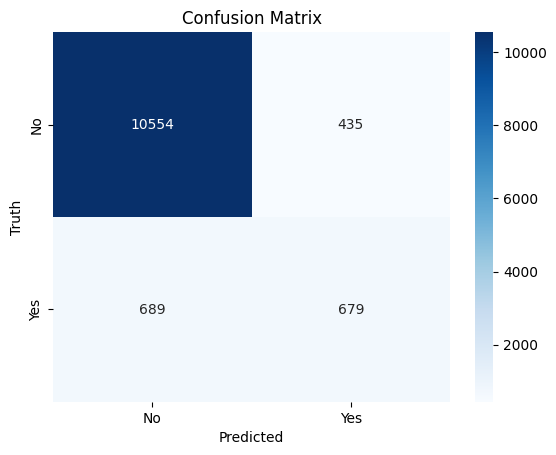

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=24)

# Train Decision Tree Classifer
clf = clf.fit(X_train5,y_train5)

#Predict the response for test dataset
y_pred5 = clf.predict(X_test5)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test5, y_pred5))

Accuracy: 0.8778829813061423


In [ ]:
#Predict the response for train dataset
y_pred_train5 = clf.predict(X_train5)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train5, y_pred_train5))

Accuracy: 0.9942076237383372


60 - 40 ratio

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train7,y_train7)

In [ ]:
y_pred7 = clf.predict(X_test7)
y_pred7

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test7, y_pred7))

Accuracy: 0.8729060451565914


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train7,y_train7)

#Predict the response for test dataset
y_pred7 = clf.predict(X_test7)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test7, y_pred7))

Accuracy: 0.8982762806506434


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train7,y_train7)

#Predict the response for test dataset
y_pred7 = clf.predict(X_test7)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test7, y_pred7))

Accuracy: 0.9017965525613013


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train7,y_train7)

#Predict the response for test dataset
y_pred77 = clf.predict(X_test7)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test7, y_pred7))

Accuracy: 0.9017965525613013


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=24)

# Train Decision Tree Classifer
clf = clf.fit(X_train7,y_train7)

#Predict the response for test dataset
y_pred7 = clf.predict(X_test7)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test7, y_pred7))

Accuracy: 0.8746054867686331


In [ ]:
#Predict the response for train dataset
y_pred_train7 = clf.predict(X_train7)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train7, y_pred_train7))

Accuracy: 0.9978148268047912


80 - 20 ratio

In [ ]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train6,y_train6)

In [ ]:
y_pred6 = clf.predict(X_test6)
y_pred6

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test6, y_pred6))

Accuracy: 0.8759407623209516


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train6,y_train6)

#Predict the response for test dataset
y_pred6 = clf.predict(X_test6)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test6, y_pred6))

Accuracy: 0.8954843408594318


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train6,y_train6)

#Predict the response for test dataset
y_pred6 = clf.predict(X_test6)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test6, y_pred6))

Accuracy: 0.9021607186210245


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train6,y_train6)

#Predict the response for test dataset
y_pred6 = clf.predict(X_test6)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test6, y_pred6))

Accuracy: 0.9093226511289147


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test6,y_pred6)
cm

array([[7073,  203],
       [ 544,  418]])

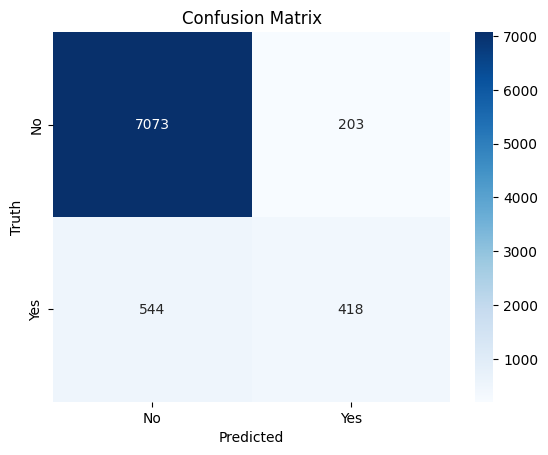

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=24)

# Train Decision Tree Classifer
clf = clf.fit(X_train6,y_train6)

#Predict the response for test dataset
y_pred6 = clf.predict(X_test6)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test6, y_pred6))

Accuracy: 0.8758193736343772


In [ ]:
#Predict the response for train dataset
y_pred_train6 = clf.predict(X_train6)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train6, y_pred_train6))

Accuracy: 0.9971168437025797


75 - 25 ratio

In [ ]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train8,y_train8)

In [ ]:
y_pred8 = clf.predict(X_test8)
y_pred8

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test8, y_pred))

Accuracy: 0.8254831504321647


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train8,y_train8)

#Predict the response for test dataset
y_pred8 = clf.predict(X_test8)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test8, y_pred8))

Accuracy: 0.9004564436243566


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train8,y_train8)

#Predict the response for test dataset
y_pred8 = clf.predict(X_test8)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test8, y_pred8))

Accuracy: 0.9058949208507332


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train8,y_train8)

#Predict the response for test dataset
y_pred8 = clf.predict(X_test8)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test8, y_pred8))

Accuracy: 0.9079343498106245


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test8,y_pred8)
cm

array([[8838,  330],
       [ 618,  511]])

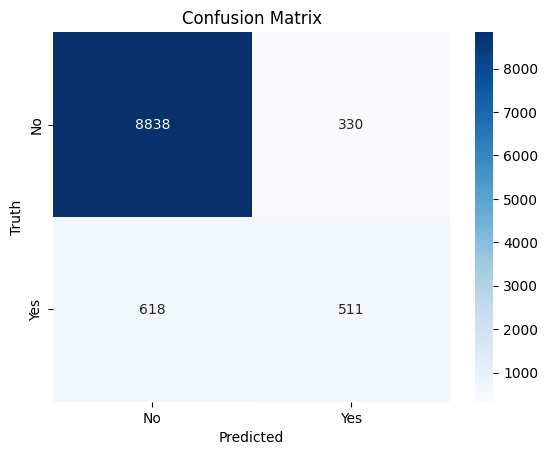

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=24)

# Train Decision Tree Classifer
clf = clf.fit(X_train8,y_train8)

#Predict the response for test dataset
y_pred8 = clf.predict(X_test8)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test8, y_pred8))

Accuracy: 0.8801592696902011


In [ ]:
#Predict the response for train dataset
y_pred_train8 = clf.predict(X_train8)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train8, y_pred_train8))

Accuracy: 0.9975397364928297




---



# Bagging - Random forest

70 - 30 ratio

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train5, y_train5)

RandomForestClassifier()

In [ ]:
y_pred5 = rf.predict(X_test5)
y_pred5

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test5, y_pred5))

Accuracy: 0.8955248037549567


In [ ]:
print(classification_report(y_test5, y_pred5))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10965
           1       0.55      0.43      0.48      1392

    accuracy                           0.90     12357
   macro avg       0.74      0.69      0.71     12357
weighted avg       0.89      0.90      0.89     12357



In [ ]:
cm = confusion_matrix(y_test5, y_pred5)
cm

array([[10463,   502],
       [  789,   603]])

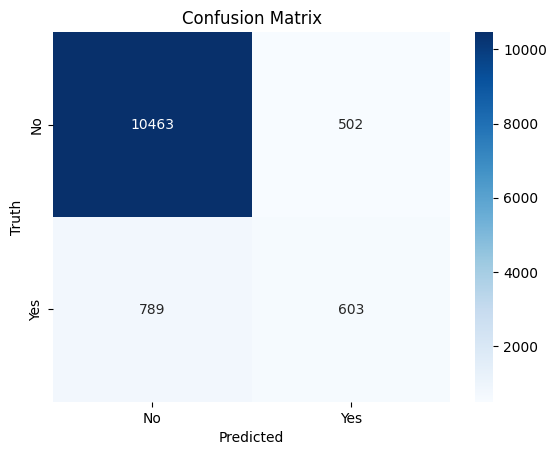

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

60 - 40 ratio

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train7, y_train7)

RandomForestClassifier()

In [ ]:
y_pred7 = rf.predict(X_test7)
y_pred7

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test7, y_pred7))

Accuracy: 0.9010682204418549


In [ ]:
print(classification_report(y_test7, y_pred7))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     14662
           1       0.56      0.46      0.51      1814

    accuracy                           0.90     16476
   macro avg       0.75      0.71      0.73     16476
weighted avg       0.89      0.90      0.90     16476



In [ ]:
cm = confusion_matrix(y_test7, y_pred7)
cm

array([[14010,   652],
       [  978,   836]])

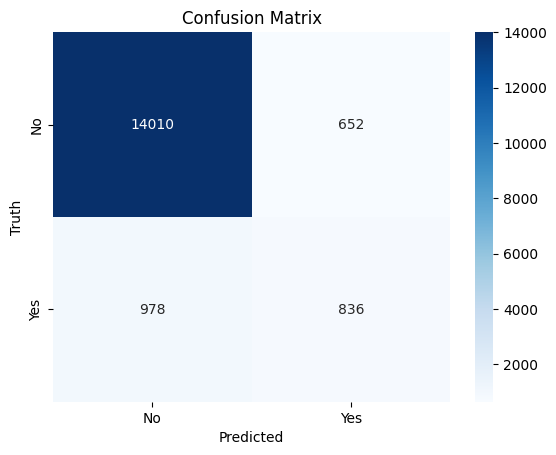

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

80 - 20 ratio

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train6, y_train6)

RandomForestClassifier()

In [ ]:
y_pred6 = rf.predict(X_test6)
y_pred6

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test6, y_pred6))

Accuracy: 0.9011896091284293


In [ ]:
print(classification_report(y_test6, y_pred6))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7276
           1       0.61      0.44      0.51       962

    accuracy                           0.90      8238
   macro avg       0.77      0.70      0.73      8238
weighted avg       0.89      0.90      0.89      8238



In [ ]:
cm = confusion_matrix(y_test6, y_pred6)
cm

array([[6999,  277],
       [ 537,  425]])

75 - 25 ratio

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train8, y_train8)

RandomForestClassifier()

In [ ]:
y_pred8 = rf.predict(X_test8)
y_pred8

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test8, y_pred8))

Accuracy: 0.9035641448965718


In [ ]:
print(classification_report(y_test8, y_pred8))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9162
           1       0.57      0.48      0.52      1135

    accuracy                           0.90     10297
   macro avg       0.76      0.72      0.73     10297
weighted avg       0.90      0.90      0.90     10297



In [ ]:
cm = confusion_matrix(y_test8, y_pred8)
cm

array([[8759,  403],
       [ 590,  545]])

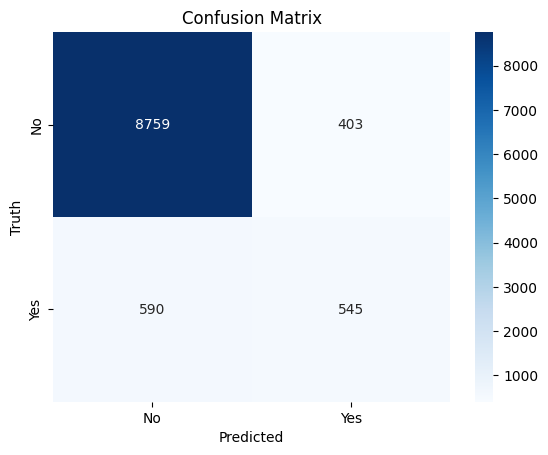

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()



---



# Boosting

XGboost

70 - 30 ratio

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier()

model = model.fit(X_train5, y_train5)

In [ ]:
from sklearn import metrics

y_pred5 = model.predict(X_test5)
y_pred5

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test5, y_pred5))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10965
           1       0.60      0.47      0.53      1392

    accuracy                           0.91     12357
   macro avg       0.77      0.72      0.74     12357
weighted avg       0.90      0.91      0.90     12357



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test5, y_pred5))

Accuracy: 0.9058023792182569


In [ ]:
cm = confusion_matrix(y_test5, y_pred5)
cm

array([[10534,   431],
       [  733,   659]])

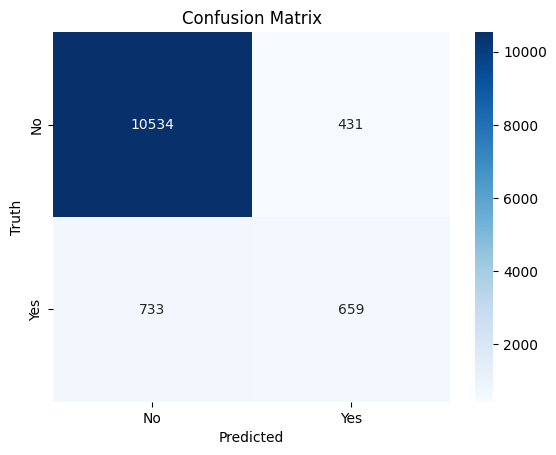

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

60 - 40 ratio

In [ ]:
model = xgb.XGBClassifier()

model = model.fit(X_train7, y_train7)

In [ ]:
from sklearn import metrics

y_pred7 = model.predict(X_test7)
y_pred7

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test7, y_pred7))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14662
           1       0.61      0.49      0.54      1814

    accuracy                           0.91     16476
   macro avg       0.77      0.72      0.74     16476
weighted avg       0.90      0.91      0.90     16476



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test7, y_pred7))

Accuracy: 0.9085336246661811


In [ ]:
cm = confusion_matrix(y_test7, y_pred7)
cm

array([[14086,   576],
       [  931,   883]])

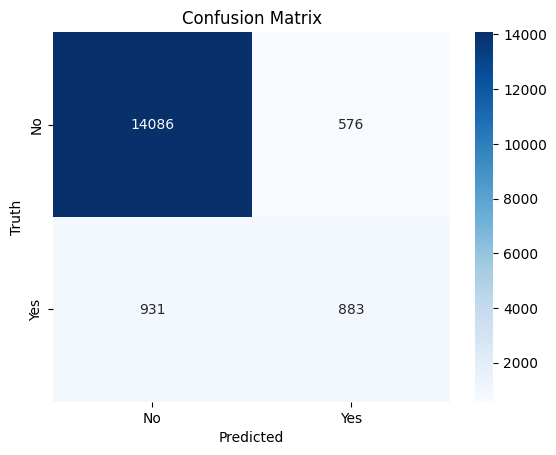

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

80 - 20 ratio

In [ ]:
model = xgb.XGBClassifier()

model = model.fit(X_train6, y_train6)

In [ ]:
from sklearn import metrics

y_pred6 = model.predict(X_test6)
y_pred6

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test6, y_pred6))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7276
           1       0.65      0.48      0.55       962

    accuracy                           0.91      8238
   macro avg       0.79      0.72      0.75      8238
weighted avg       0.90      0.91      0.90      8238



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test6, y_pred6))

Accuracy: 0.9094440398154892


In [ ]:
cm = confusion_matrix(y_test6, y_pred6)
cm

array([[7027,  249],
       [ 497,  465]])

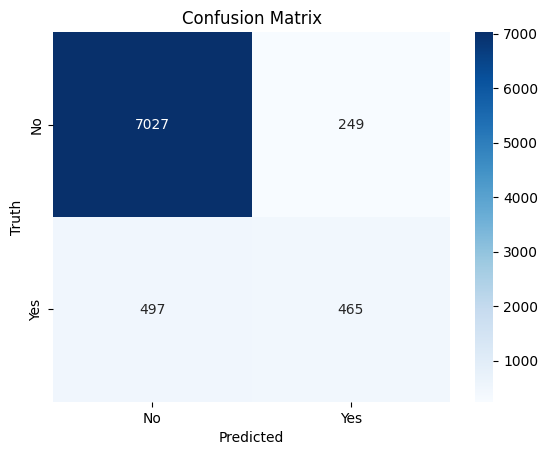

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

75 - 25 ratio

In [ ]:
model = xgb.XGBClassifier()

model = model.fit(X_train8, y_train8)

In [ ]:
from sklearn import metrics

y_pred8 = model.predict(X_test8)
y_pred8

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test8, y_pred8))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9162
           1       0.62      0.49      0.55      1135

    accuracy                           0.91     10297
   macro avg       0.78      0.73      0.75     10297
weighted avg       0.90      0.91      0.91     10297



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test8, y_pred8))

Accuracy: 0.9110420510828396


In [ ]:
cm = confusion_matrix(y_test8, y_pred8)
cm

array([[8824,  338],
       [ 578,  557]])

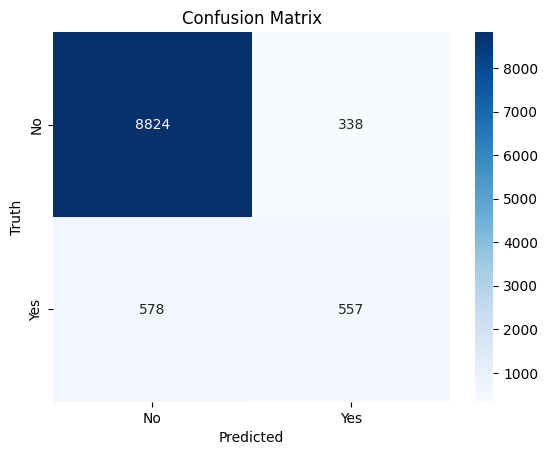

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

ADAboost

70 - 30 ratio

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize the AdaBoost classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the model on the training data
model.fit(X_train5, y_train5)

# Predict on the test data
y_pred5 = model.predict(X_test5)

# Calculate the accuracy
accuracy = accuracy_score(y_test5, y_pred5)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test5, y_pred5))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.903
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10965
           1       0.62      0.36      0.46      1392

    accuracy                           0.90     12357
   macro avg       0.77      0.67      0.70     12357
weighted avg       0.89      0.90      0.89     12357



In [ ]:
cm = confusion_matrix(y_test5, y_pred5)
cm

array([[10651,   314],
       [  885,   507]])

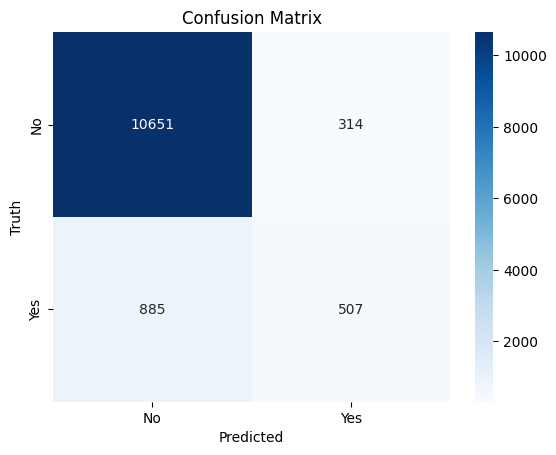

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

60 - 40 ratio

In [ ]:
# Initialize the AdaBoost classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the model on the training data
model.fit(X_train7, y_train7)

# Predict on the test data
y_pred7 = model.predict(X_test7)

# Calculate the accuracy
accuracy = accuracy_score(y_test7, y_pred7)
print(f"Accuracy: {accuracy:.5f}")
print(classification_report(y_test7, y_pred7))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.90653
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14662
           1       0.62      0.40      0.48      1814

    accuracy                           0.91     16476
   macro avg       0.77      0.68      0.72     16476
weighted avg       0.89      0.91      0.90     16476



In [ ]:
cm = confusion_matrix(y_test7, y_pred7)
cm

array([[14213,   449],
       [ 1091,   723]])

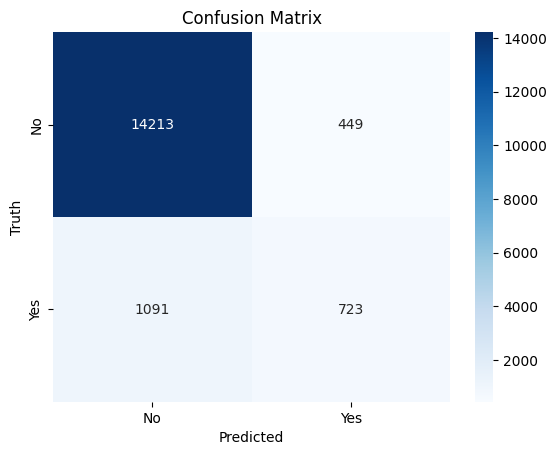

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

80 - 20 ratio

In [ ]:
# Initialize the AdaBoost classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the model on the training data
model.fit(X_train6, y_train6)

# Predict on the test data
y_pred6 = model.predict(X_test6)

# Calculate the accuracy
accuracy = accuracy_score(y_test6, y_pred6)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test6, y_pred6))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.901
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7276
           1       0.63      0.37      0.46       962

    accuracy                           0.90      8238
   macro avg       0.78      0.67      0.71      8238
weighted avg       0.89      0.90      0.89      8238



In [ ]:
cm = confusion_matrix(y_test6, y_pred6)
cm

array([[7069,  207],
       [ 608,  354]])

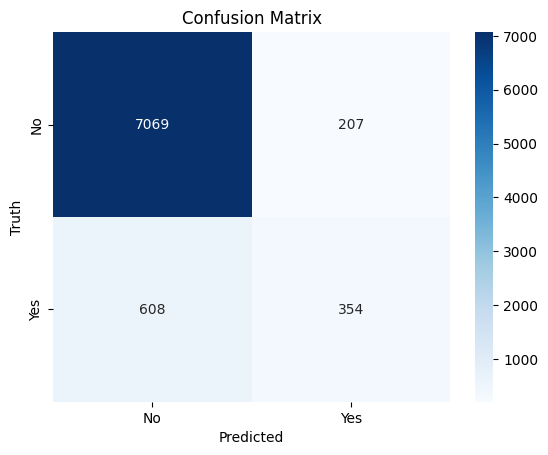

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

75 - 25 ratio

In [ ]:
# Initialize the AdaBoost classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the model on the training data
model.fit(X_train8, y_train8)

# Predict on the test data
y_pred8 = model.predict(X_test8)

# Calculate the accuracy
accuracy = accuracy_score(y_test8, y_pred8)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test8, y_pred8))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.907
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9162
           1       0.63      0.37      0.47      1135

    accuracy                           0.91     10297
   macro avg       0.78      0.67      0.71     10297
weighted avg       0.89      0.91      0.90     10297



In [ ]:
cm = confusion_matrix(y_test8, y_pred8)
cm

array([[8915,  247],
       [ 710,  425]])

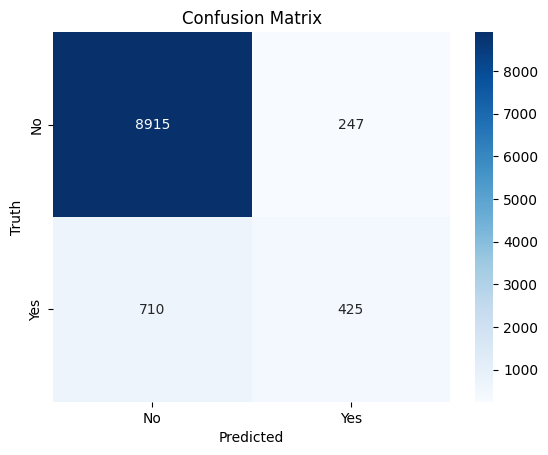

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()



---



# Ann

70 - 30

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train5, y_train5, epochs= 100)

Epoch 1/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - a=recall: 0.0122 - accuracy: 0.8763 - loss: 0.8598 - precision: 0.1012
Epoch 2/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8869 - loss: 0.2815 - precision: 0.0000e+00
Epoch 3/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8869 - loss: 0.2435 - precision: 0.0000e+00
Epoch 4/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8869 - loss: 0.2302 - precision: 0.0000e+00
Epoch 5/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - a=recall: 0.1078 - accuracy: 0.8886 - loss: 0.2211 - precision: 0.3905
Epoch 6/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - a=recall: 0.2553 - accuracy: 0.8914 - loss: 0.2224 - precision: 0.5195
Epoch 7/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - a=recall: 0.4120 - accuracy: 0.8990 - loss: 0.2174 - precision: 0.5753
Epoch 8/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.4751 - accuracy: 0.8991 - l

In [ ]:
model.evaluate(X_test5, y_test5)

387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - a=recall: 0.6083 - accuracy: 0.8988 - loss: 0.2071 - precision: 0.5344


[0.2088964581489563, 0.9010277390480042, 0.552763819694519, 0.6326383948326111]

<Axes: >

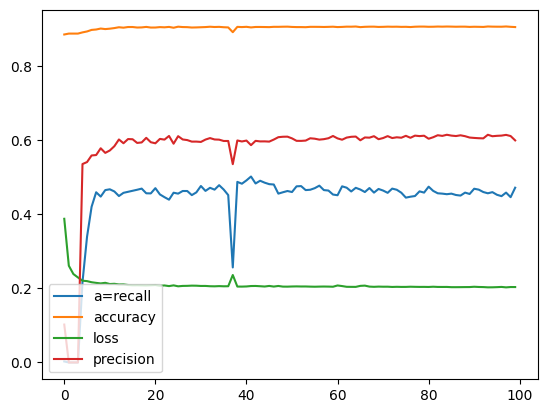

In [ ]:
pd.DataFrame(history.history).plot()

80 - 20

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train6, y_train6, epochs= 100)

Epoch 1/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - a=recall: 0.0475 - accuracy: 0.8506 - loss: 1.4977 - precision: 0.1078
Epoch 2/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - a=recall: 0.0000e+00 - accuracy: 0.8886 - loss: 0.2552 - precision: 0.0000e+00
Epoch 3/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8886 - loss: 0.2376 - precision: 0.0000e+00
Epoch 4/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8886 - loss: 0.2296 - precision: 0.0000e+00
Epoch 5/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - a=recall: 6.8950e-05 - accuracy: 0.8886 - loss: 0.2211 - precision: 0.2260
Epoch 6/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - a=recall: 0.0797 - accuracy: 0.8898 - loss: 0.2189 - precision: 0.3508
Epoch 7/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - a=recall: 0.1504 - accuracy: 0.8886 - loss: 0.2165 - precision: 0.4580
Epoch 8/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.3176 - 

In [ ]:
model.evaluate(X_test6, y_test6)

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - a=recall: 0.5025 - accuracy: 0.9085 - loss: 0.2050 - precision: 0.6311


[0.2078605741262436,
 0.9070162773132324,
 0.6091644167900085,
 0.48706895112991333]

<Axes: >

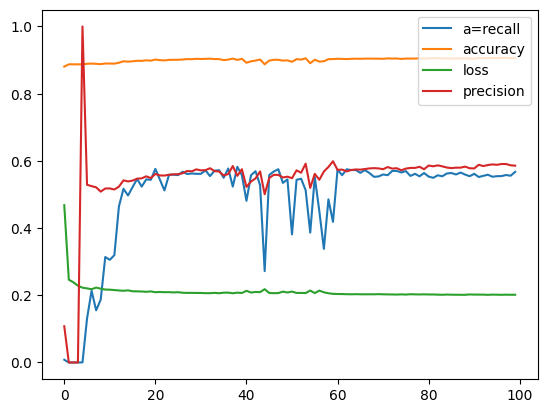

In [ ]:
pd.DataFrame(history.history).plot()

60 - 40

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train7, y_train7, epochs= 100)

Epoch 1/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - a=recall: 0.1275 - accuracy: 0.8310 - loss: 0.9715 - precision: 0.2307
Epoch 2/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - a=recall: 0.2002 - accuracy: 0.8963 - loss: 0.2218 - precision: 0.5858
Epoch 3/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - a=recall: 0.2339 - accuracy: 0.8979 - loss: 0.2175 - precision: 0.5927
Epoch 4/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - a=recall: 0.2299 - accuracy: 0.8974 - loss: 0.2159 - precision: 0.5840
Epoch 5/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - a=recall: 0.2358 - accuracy: 0.8982 - loss: 0.2118 - precision: 0.5942
Epoch 6/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - a=recall: 0.2576 - accuracy: 0.9000 - loss: 0.2122 - precision: 0.6105
Epoch 7/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.2762 - accuracy: 0.8996 - loss: 0.2074 - precision: 0.5998
Epoch 8/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - a=recall: 0.3022 - accuracy: 0.9011 - loss: 0.2057 - precision

In [ ]:
model.evaluate(X_test7, y_test7)

515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - a=recall: 0.4541 - accuracy: 0.9072 - loss: 0.1999 - precision: 0.5920


[0.20822304487228394,
 0.9074411392211914,
 0.6184767484664917,
 0.4712520241737366]

<Axes: >

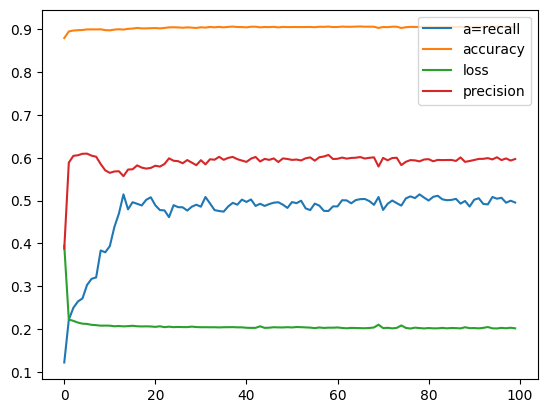

In [ ]:
pd.DataFrame(history.history).plot()

75 - 25

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train8, y_train8, epochs= 100)

Epoch 1/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - a=recall: 0.1765 - accuracy: 0.8470 - loss: 0.8396 - precision: 0.3163
Epoch 2/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.1639 - accuracy: 0.8899 - loss: 0.2362 - precision: 0.5488
Epoch 3/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.1823 - accuracy: 0.8900 - loss: 0.2248 - precision: 0.5435
Epoch 4/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - a=recall: 0.2322 - accuracy: 0.8934 - loss: 0.2192 - precision: 0.5724
Epoch 5/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - a=recall: 0.2744 - accuracy: 0.8973 - loss: 0.2183 - precision: 0.6034
Epoch 6/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.3003 - accuracy: 0.9004 - loss: 0.2142 - precision: 0.6262
Epoch 7/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - a=recall: 0.3467 - accuracy: 0.9024 - loss: 0.2115 - precision: 0.6224
Epoch 8/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.3396 - accuracy: 0.9001 - loss: 0.2127 - precision:

In [ ]:
model.evaluate(X_test8, y_test8)

322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - a=recall: 0.5408 - accuracy: 0.9097 - loss: 0.1976 - precision: 0.5997


[0.20620805025100708,
 0.9074487686157227,
 0.5984405279159546,
 0.5316017270088196]

<Axes: >

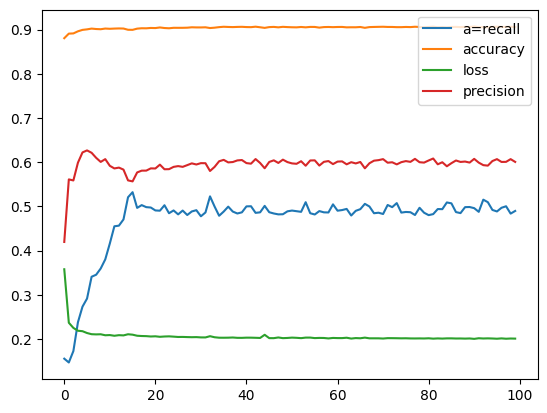

In [ ]:
pd.DataFrame(history.history).plot()



---

